# Assignment 2

In this assignment, we will we analysing the dataset from a Bike Sharing system in Washington. The dataset contains various factors that could interfere in whether someone would take a bike, such as temperature, time of day, wind speed, among others, we have three different targets, the number of registered users using the services, the number of casual users doing the same, and the total number of users, we will be using a regression model for every feature, along with two classification models for the easiest feature to predict with regression, and in the end we will compare the results and differences inbetween them.

# Loading the data

To start our analysis we will fist load our dataset onto python and get the header, just to take a first look at the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pingouin as pg

bike_hourly = pd.read_csv("hour.csv")
bike_hourly

C:\Users\lucas\anaconda3\envs\data_mining\Lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


From the header of the data we can get an idea of what our data is about, our target is the number of riders in the system, separated into casual, registered and the total. We also have a lot of different features that could prove useful in our predictions later.

Before splitting our data into training and testing, we need to first for any NaN or invalid values. 

In [2]:
bike_hourly.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

As can be seen, we have no NaN values that means our data is clean and we can continue with our analysis without any concerns.

Next we will split our data into training and testing data, we will be using a ratio of 8/2, that means 80% of our data will be used for training and 20% will be used in testing our model, this is a standard split ratio that ensures we have plenty of data to train on and still keep a good amount of data to use for testing.

In [3]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(bike_hourly, test_size=0.2)

We now have 2 different dataframes, one that will be used to train our model and another to test it, we will now proceed to the E.D.A of our train data, before we start modeling.

# Exploratory data analysis

Before we start modeling we first need to do an analysis of our data, this is important to give us a direction on what to do, how each feature relates to our target and to other features and how to handle them when training our model.

We already checked and there aren't any NaN values on our dataset, it is already mostly clean, we just need to change the datatypes for some features.

In [4]:
# Changing 'workingday' and 'holiday' columns to boolean types for train_data
train_data['workingday'] = train_data['workingday'].astype('bool')
train_data['holiday'] = train_data['holiday'].astype('bool')

# Changing 'workingday' and 'holiday' columns to boolean types for test_data
test_data['workingday'] = test_data['workingday'].astype('bool')
test_data['holiday'] = test_data['holiday'].astype('bool')

train_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11030,11031,2012-04-09,2,1,4,18,False,1,True,1,0.54,0.5152,0.34,0.2985,60,586,646
2175,2176,2011-04-05,2,0,4,12,False,2,True,2,0.34,0.3030,0.71,0.3881,6,32,38
7240,7241,2011-11-03,4,0,11,7,False,4,True,2,0.32,0.3333,0.81,0.0896,12,280,292
8655,8656,2012-01-01,1,1,1,10,False,0,False,1,0.30,0.3182,0.81,0.1045,18,52,70
16545,16546,2012-11-27,4,1,11,3,False,2,True,3,0.32,0.3333,0.70,0.1343,1,3,4


Now workingday and holiday are boolean features, doing so will make them more readable and more useful to our models, while keeping all of their information.

We can also change some columns into categorical features.

We can also change the yr feature into a boolean; that would be something close to the process called one-hot encoding, where you take a categorical feature and separate it into various boolean features, each one symbolizing if the original value was one of the categories. 

E.g. we have a feature, colour, that can be either red, blue or green, to one-hot encode this, we can create three new columns, is_red, is_blue, is_green, if the original value was blue then we would make the value of our new colums true for is_blue and false for is_red and is_green.

That approach usually has the disadvantage of generating too many new columns which can create difficulties when creating a model and increase the runtime for it, in this case we can just change our yr feature, which has two values into a single boolean column "is_yr_1" in that way "one-hot encoding" it without generating new columns and keeping the original data while making it more manageable for us and our model.

In [5]:
# change the name of column 'yr' into 'is_yr_one' 
#Changing 'yr' collumn to boolean type for both train and test data 
train_data['yr'] = train_data['yr'].astype('bool')
test_data['yr'] = test_data['yr'].astype('bool')

#Changing the name of the 'yr' collumn into 'is_yr_one'
train_data.rename(columns={'yr': 'is_yr_one'}, inplace=True)
test_data.rename(columns={'yr': 'is_yr_one'}, inplace=True)

After changing that many datatypes it can be a good idea to check for any NaN values that can be caused by improper conversion.

In [6]:
train_data.isna().sum()

instant       0
dteday        0
season        0
is_yr_one     0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
test_data.isna().sum()

instant       0
dteday        0
season        0
is_yr_one     0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Thankfully all our conversions went trough wintout any problems, we can just continue on with our E.D.A

We can now take another look into our dataframe with the new datatypes.

In [8]:
train_data

,instant,dteday,season,is_yr_one,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11030,11031,2012-04-09,2,True,4,18,False,1,True,1,0.54,0.5152,0.34,0.2985,60,586,646
2175,2176,2011-04-05,2,False,4,12,False,2,True,2,0.34,0.3030,0.71,0.3881,6,32,38
7240,7241,2011-11-03,4,False,11,7,False,4,True,2,0.32,0.3333,0.81,0.0896,12,280,292
8655,8656,2012-01-01,1,True,1,10,False,0,False,1,0.30,0.3182,0.81,0.1045,18,52,70
16545,16546,2012-11-27,4,True,11,3,False,2,True,3,0.32,0.3333,0.70,0.1343,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9016,9017,2012-01-16,1,True,1,13,True,1,False,2,0.24,0.1970,0.41,0.4179,26,202,228
14433,14434,2012-08-29,3,True,8,14,False,3,True,1,0.76,0.6818,0.40,0.0896,87,214,301
999,1000,2011-02-14,1,False,2,7,False,1,True,1,0.34,0.3030,0.46,0.2985,2,96,98
11705,11706,2012-05-07,2,True,5,22,False,1,True,2,0.54,0.5152,0.45,0.2537,26,147,173


Our data now looks overall way more readable, and the alterations we made will hopefully help with creating our models later.

# Visualisation functions

First, we will make some standard visualisation functions so we can visualize both categorical and numerical features without repeating our code all the time.

In [9]:
def numVisualisation (feature : str):#Generic function to create basic visualisations for numerical features
    fig, axes = plt.subplots(1,2, figsize=(25, 10))
    sns.histplot(data=train_data,x=feature,ax=axes[0])
    sns.violinplot(data=train_data,x=feature,ax=axes[1])

def catVisualisation(feature : str):#Generic function to create basic visualisations for categorical targets
    sns.countplot(data=train_data,x=feature)

Next we will make some functions to visualise the relationship of our features to the targets.

In [10]:
def numVisualisationTgt(feature : str):#Generic function to create vizualizations of the relationship between the feature and targets for numerical features
    fig, axes = plt.subplots(3,1, figsize=(25, 10))
    sns.regplot(data=train_data.sample(200),x='casual',y= feature,ax=axes[0])#we are only using a random sampling of 100 values as to make
    sns.regplot(data=train_data.sample(200),x='registered',y= feature,ax=axes[1])#the visualisations more reabable while keeping the data
    sns.regplot(data=train_data.sample(200),x='cnt',y= feature,ax=axes[2])

def catVisualisationTgt(feature : str):#generic function to create visualisations of the relationship between the feature and the targets for categorical features
    fig, axes = plt.subplots(3,1, figsize=(25, 10))
    sns.boxplot(data=train_data.sample(200),x='casual',y=feature,ax=axes[0],log_scale=True,orient='h')
    sns.boxplot(data=train_data.sample(200),x='registered',y=feature,ax=axes[1],log_scale=True,orient='h')
    sns.boxplot(data=train_data.sample(200),x='cnt',y=feature,ax=axes[2],log_scale=True,orient='h')

def XLcatVisualisationTgt(feature : str):#generic fucntion to create viasualisations of the realtionship between the feature and the targets for categorical features with lots of categories
    fig, axes = plt.subplots(3,1, figsize=(25, 10))
    sns.barplot(data=train_data,x=feature,y='casual',ax=axes[0])
    sns.barplot(data=train_data,x=feature,y='registered',ax=axes[1])
    sns.barplot(data=train_data,x=feature,y='cnt',ax=axes[2])
def boolVisualisationTgt(feature : str):#generic function to create visualisations of the relationship between the feature and the targets for boolean features
    fig, axes = plt.subplots(3,1, figsize=(25, 10))
    sns.histplot(data=train_data.sample(200),hue=feature,x='casual',ax=axes[0],multiple='stack',log_scale=True)
    sns.histplot(data=train_data.sample(200),hue=feature,x='registered',ax=axes[1],multiple='stack',log_scale=True)
    sns.histplot(data=train_data.sample(200),hue=feature,x='cnt',ax=axes[2],multiple='stack',log_scale=True)
    #the reason for using logarithmic scaling where availiable will be explained later

# Target analysis

Before proceeding to analyzing our fetures it is a good idea to take a look at the overall shape and distribution of our targets.

<Axes: xlabel='cnt', ylabel='Count'>

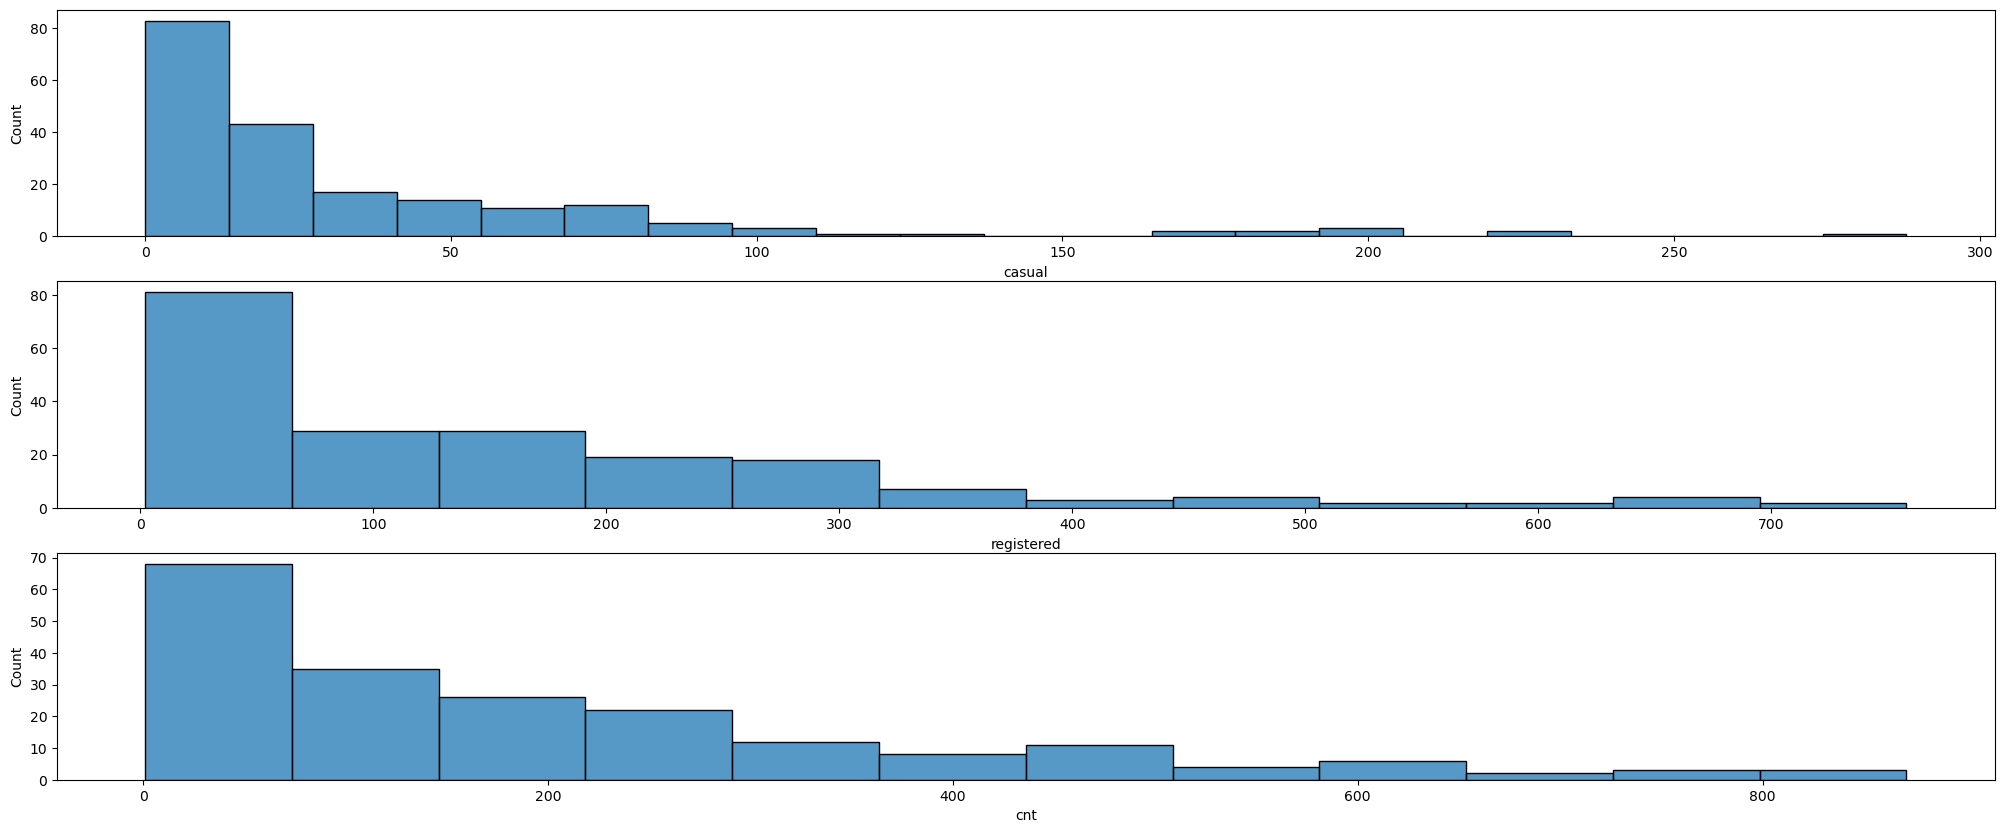

In [11]:
fig, axes = plt.subplots(3,1, figsize=(25, 10))
sns.histplot(data=train_data.sample(200),x='casual',ax=axes[0])
sns.histplot(data=train_data.sample(200),x='registered',ax=axes[1])
sns.histplot(data=train_data.sample(200),x='cnt',ax=axes[2])

As can be seen in our graphs all of our targets have a mostly exponential distribution, that is alright and will not have an impact on our modeling, but it can skew some of our visualisations, so to make them more accurately represent the data, we will be using logarithmic scaling for visualising relationships between our targets and the features where it is available.

We can further verify that distribution with a q-q plot.

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

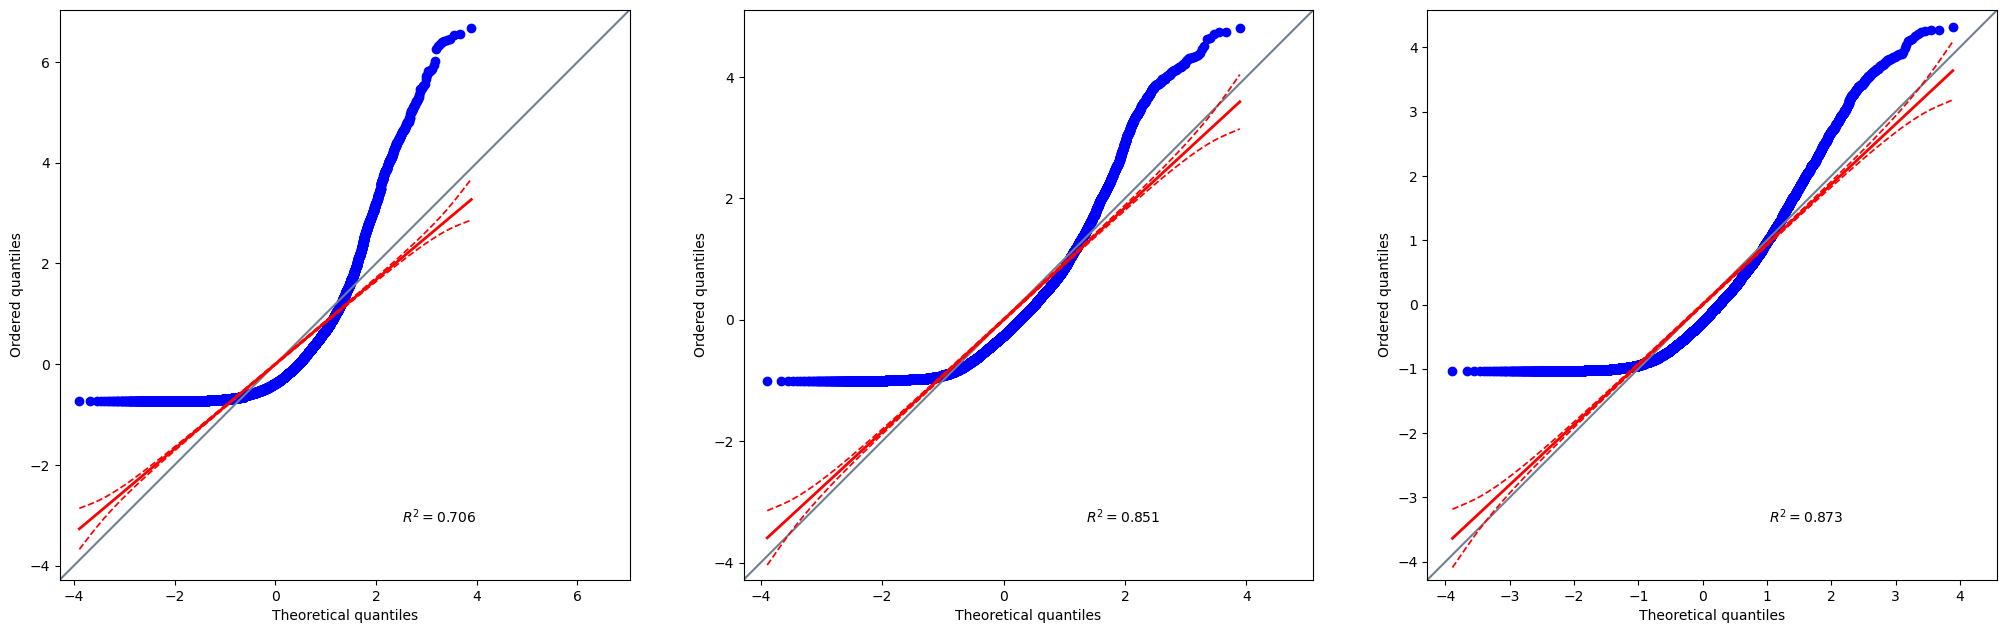

In [12]:
fig, axes = plt.subplots(1,3, figsize=(25, 10))
pg.qqplot(train_data.casual,ax=axes[0])
pg.qqplot(train_data.registered,ax=axes[1])
pg.qqplot(train_data.cnt,ax=axes[2])

As can be seen they all fall fairly close to an exponential distribution, so the logarithmic scaling will be beneficial to us.

# Feature analysis

# Date

Testing revealed that dteday and some features I tried deriving from it weren't usueful, so its best to just drop it.

In [13]:
train_data.drop('dteday',axis=1,inplace=True)
test_data.drop('dteday',axis=1,inplace=True)

train_data.head()

,instant,season,is_yr_one,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11030,11031,2,True,4,18,False,1,True,1,0.54,0.5152,0.34,0.2985,60,586,646
2175,2176,2,False,4,12,False,2,True,2,0.34,0.3030,0.71,0.3881,6,32,38
7240,7241,4,False,11,7,False,4,True,2,0.32,0.3333,0.81,0.0896,12,280,292
8655,8656,1,True,1,10,False,0,False,1,0.30,0.3182,0.81,0.1045,18,52,70
16545,16546,4,True,11,3,False,2,True,3,0.32,0.3333,0.70,0.1343,1,3,4


# Season

We will start first with the season feature, it is a categorical feature with values ranging from 1 to 4 to represent the different seasons of the year. 

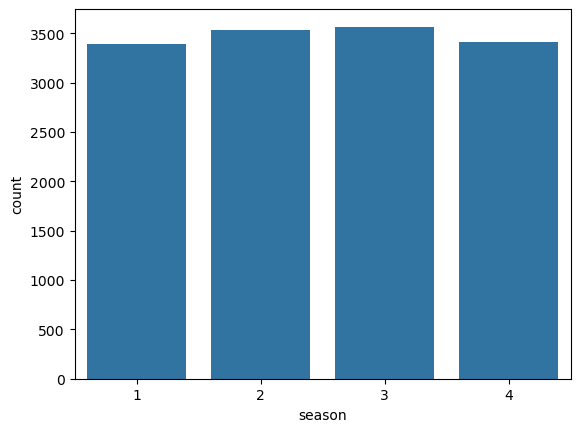

In [14]:
catVisualisation("season")

As can be seen, all of our different categories seem to have a similar number of entries represented, so that will not be a problem. Using common sense, we can predict that season is probably very closely related to temperature and humidity, other two features that we have in our dataset, we can do some visualizations to confirm that.

<Axes: xlabel='hum', ylabel='season'>

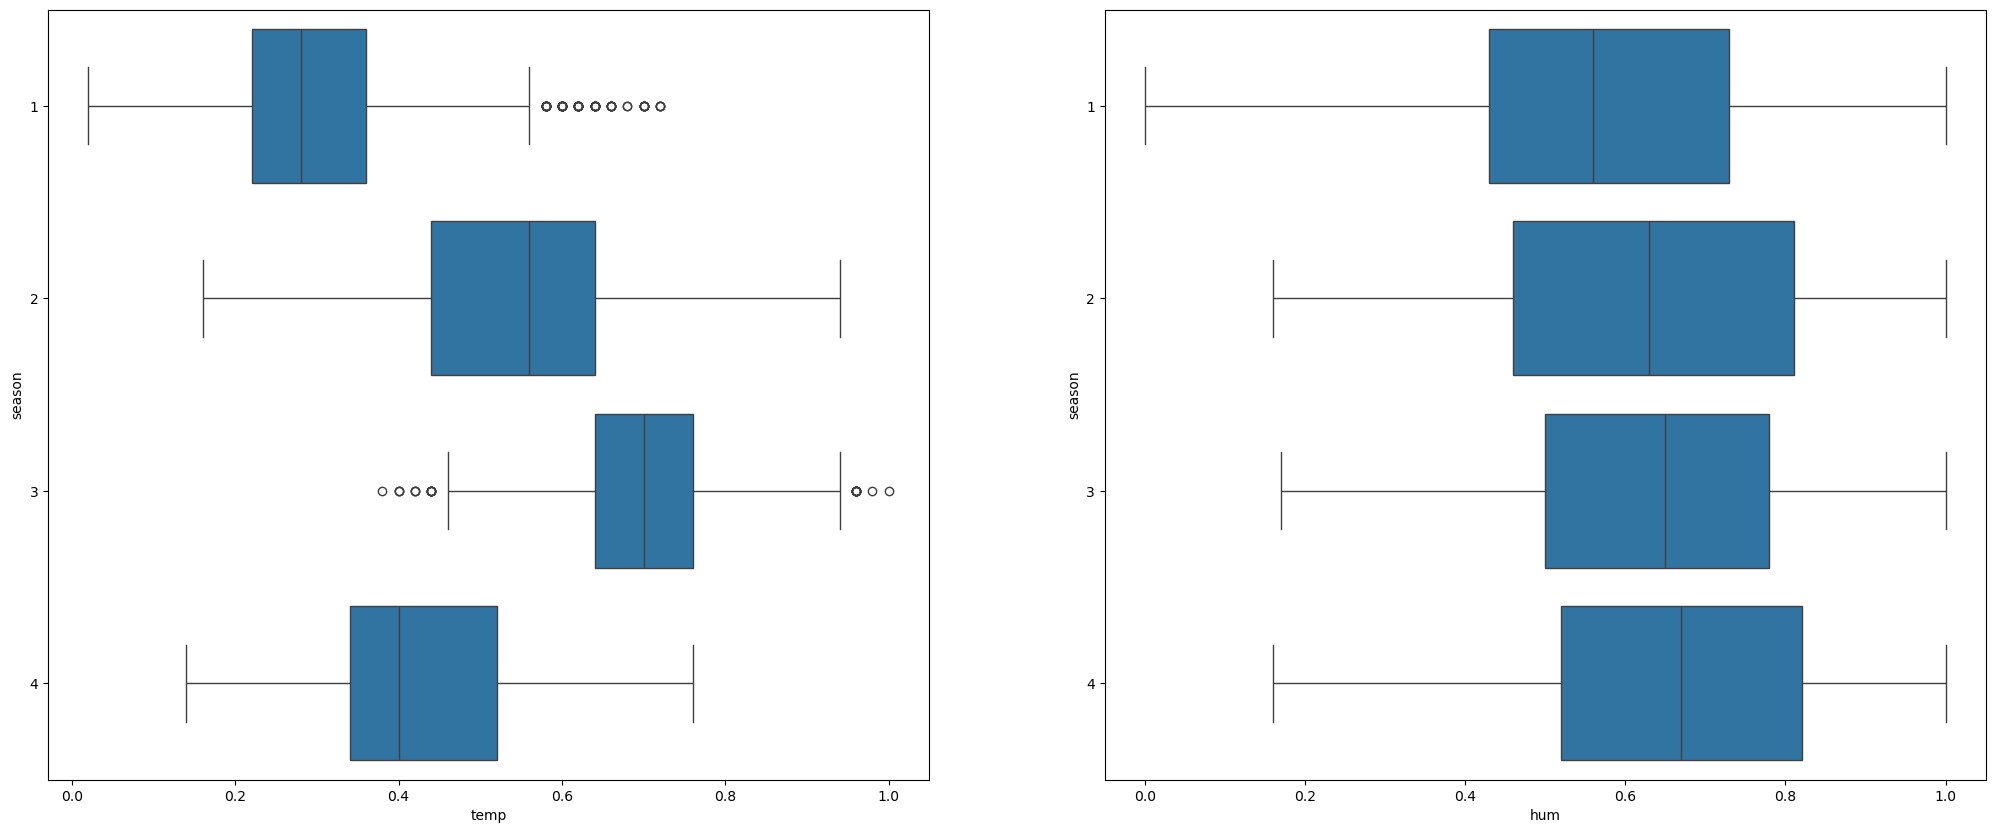

In [15]:
fig, axes = plt.subplots(1,2, figsize=(25, 10))
sns.boxplot(train_data,x="temp",y="season",ax=axes[0],orient='h')
sns.boxplot(train_data,x="hum",y="season",ax=axes[1],orient='h')

As expected there seems to be a decent correlation between them, we will further verify that later with the correlation matrix, that indicates to us that they should not be included together in our model, even if both seem like good predictors, so as to not overrepresent any feature, we can proceed to seeing the realtionship between this feature and our targets.

C:\Users\lucas\anaconda3\envs\data_mining\Lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


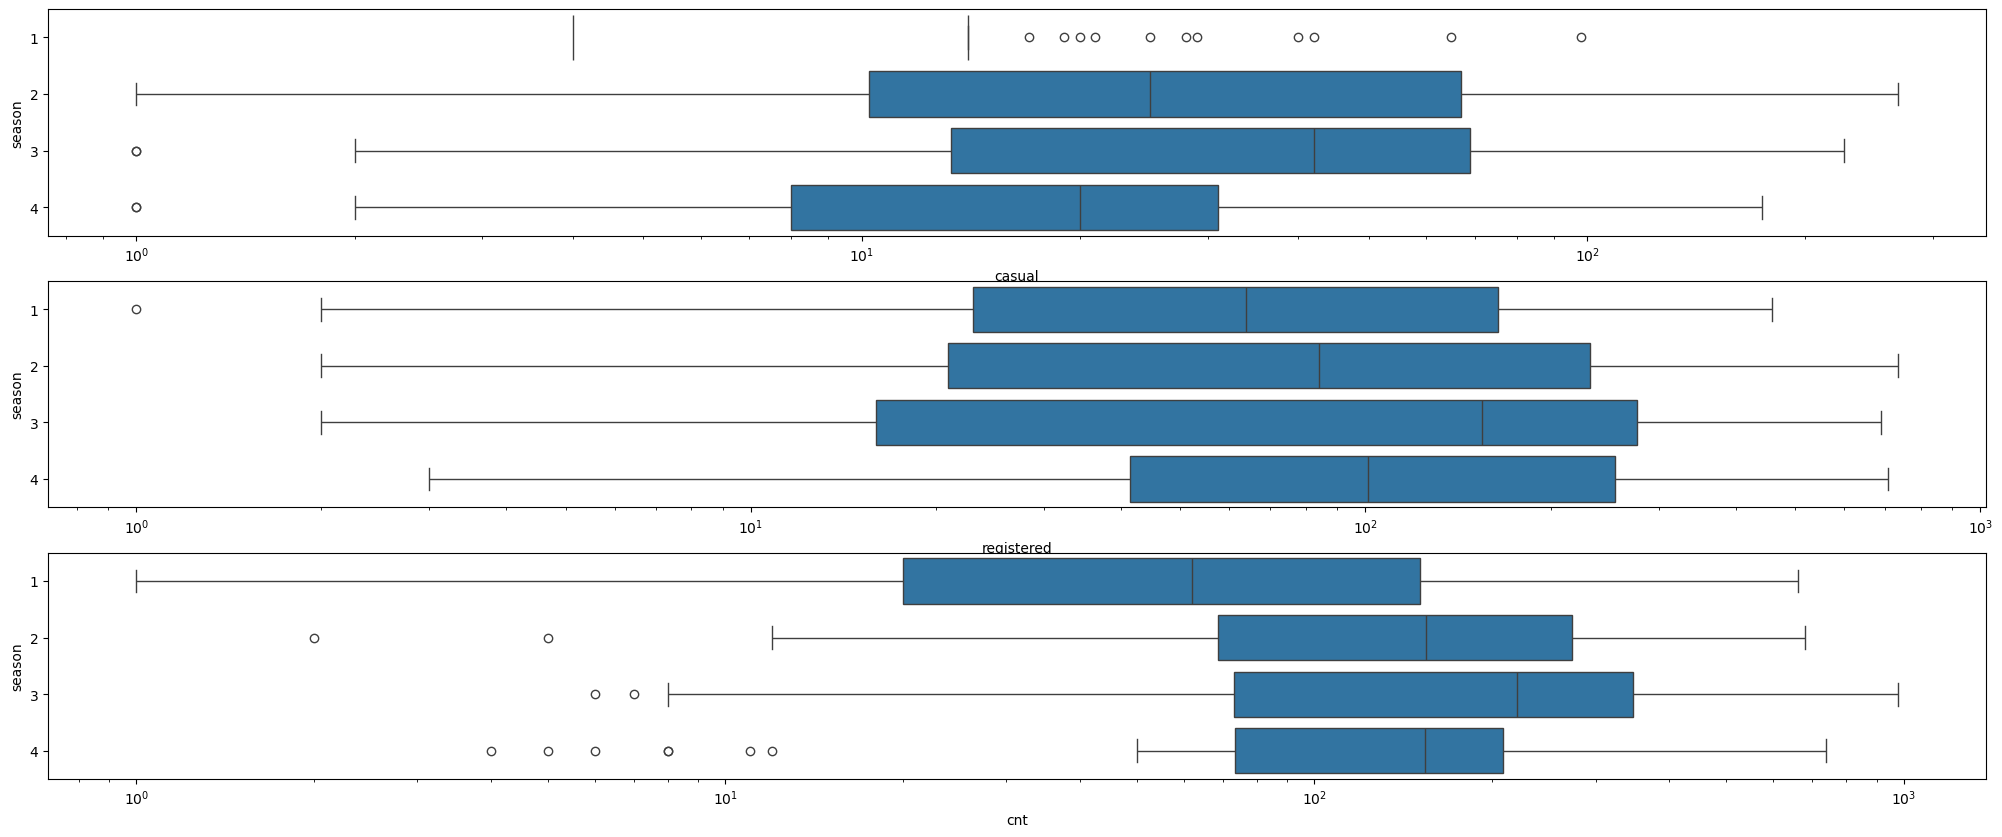

In [16]:
catVisualisationTgt('season')

There seems to be a decent relationship between the target and all features, but we need to be careful if including it in our model, for the reasons previously discussed.

# Is_yr_one

We will now analyze our is_yr_one feature, it is a boolean feature that tells us if the rental was made in year one or not.

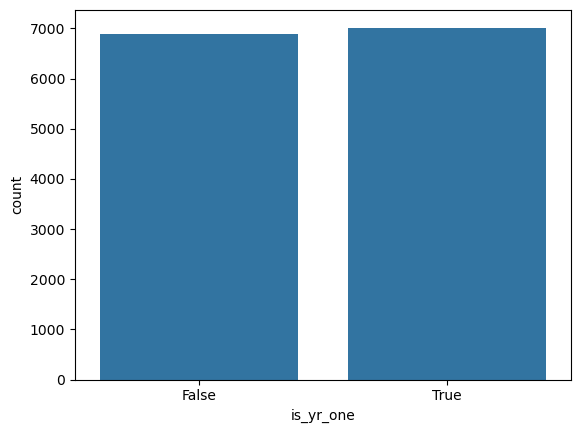

In [17]:
catVisualisation("is_yr_one")

As expected, it is a fairly simple feature with close to equal representation, for now there aren't many other features that seem like they would be related to is_yr_one, but we will further verify it later, for now we will take a look at its relationship to our targets.

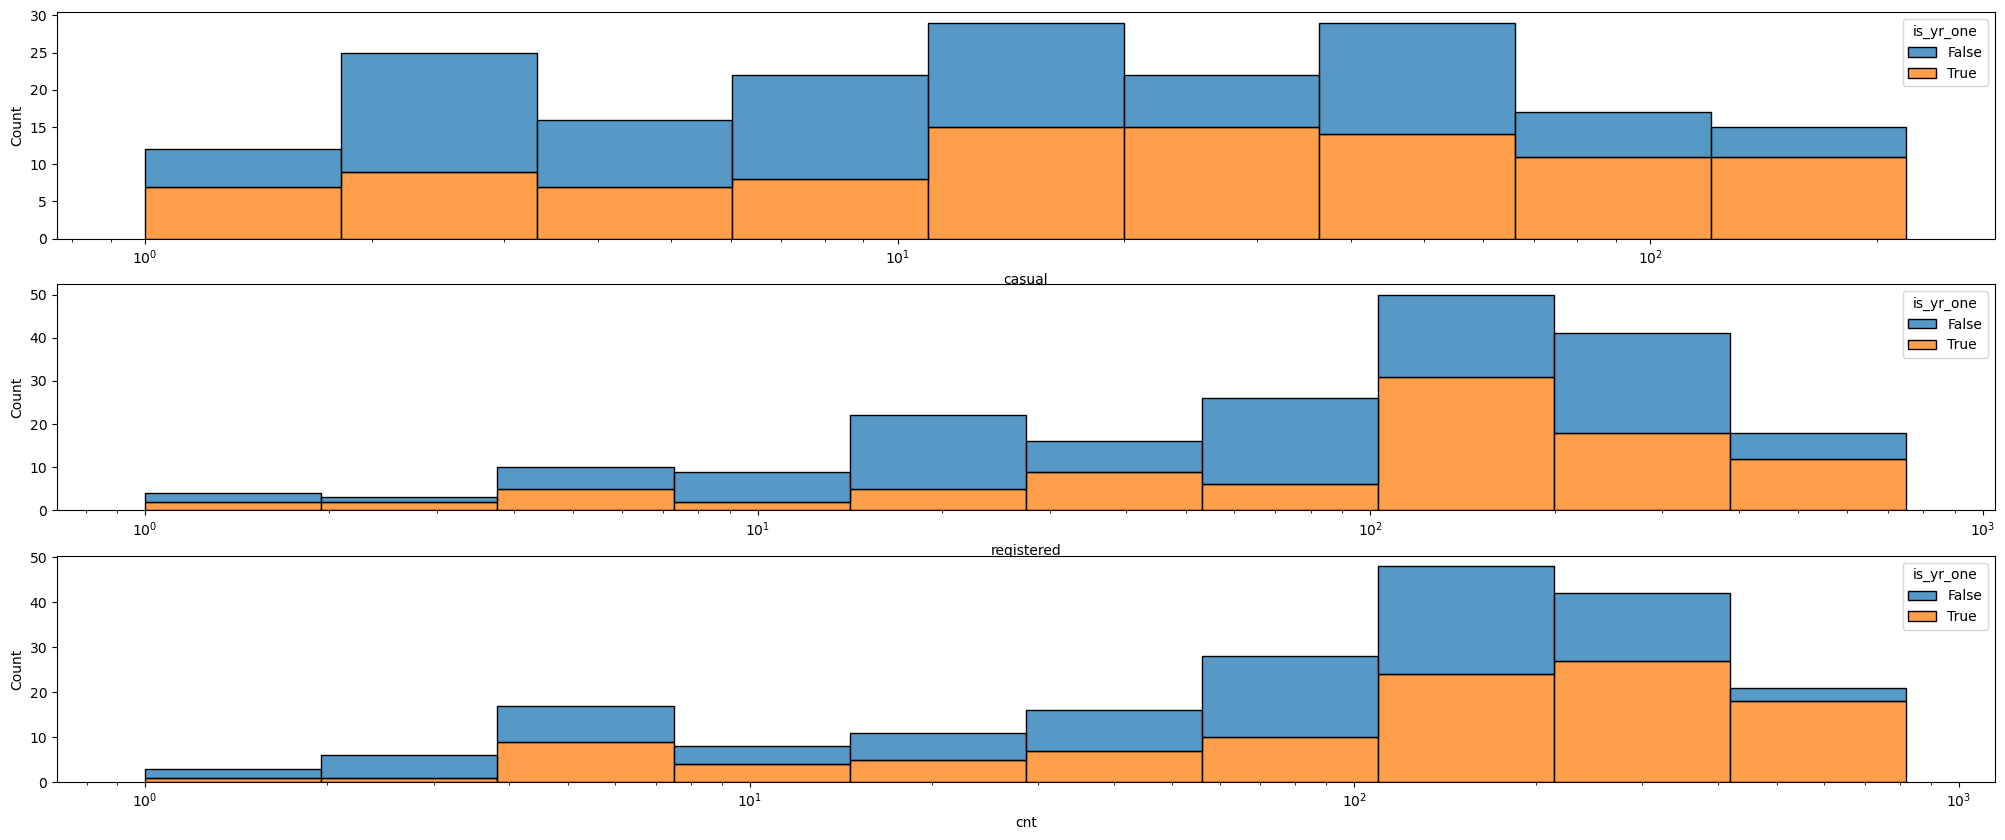

In [18]:
boolVisualisationTgt('is_yr_one')

There seems like there could be a slight correlation with year one having a few more hours with extremely high traffic, but it's hard to tell from just the visualisation. The correlation matrix later will help with confirming this later.

# Month

We will now analyze mnth, it is a categorical feature with values from 1 to 12 representing each of the months of the year, for now it is encoded as a numerical feature, that is known as integer encoded, that can be easily changed later depending if we deem it necessary.

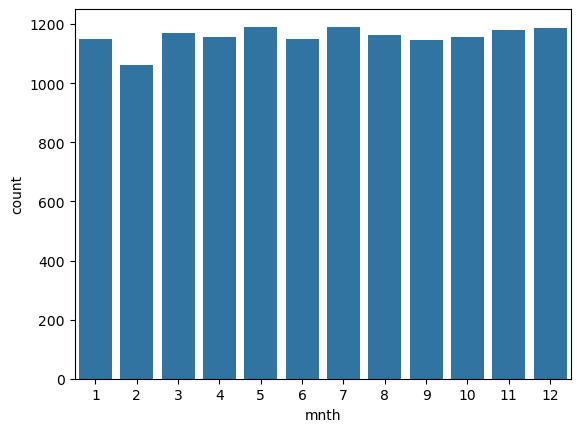

In [19]:
catVisualisation('mnth')

Again our feature is well distibuted with roughly equal representation for every category.

We can now check the relationship to our targets.

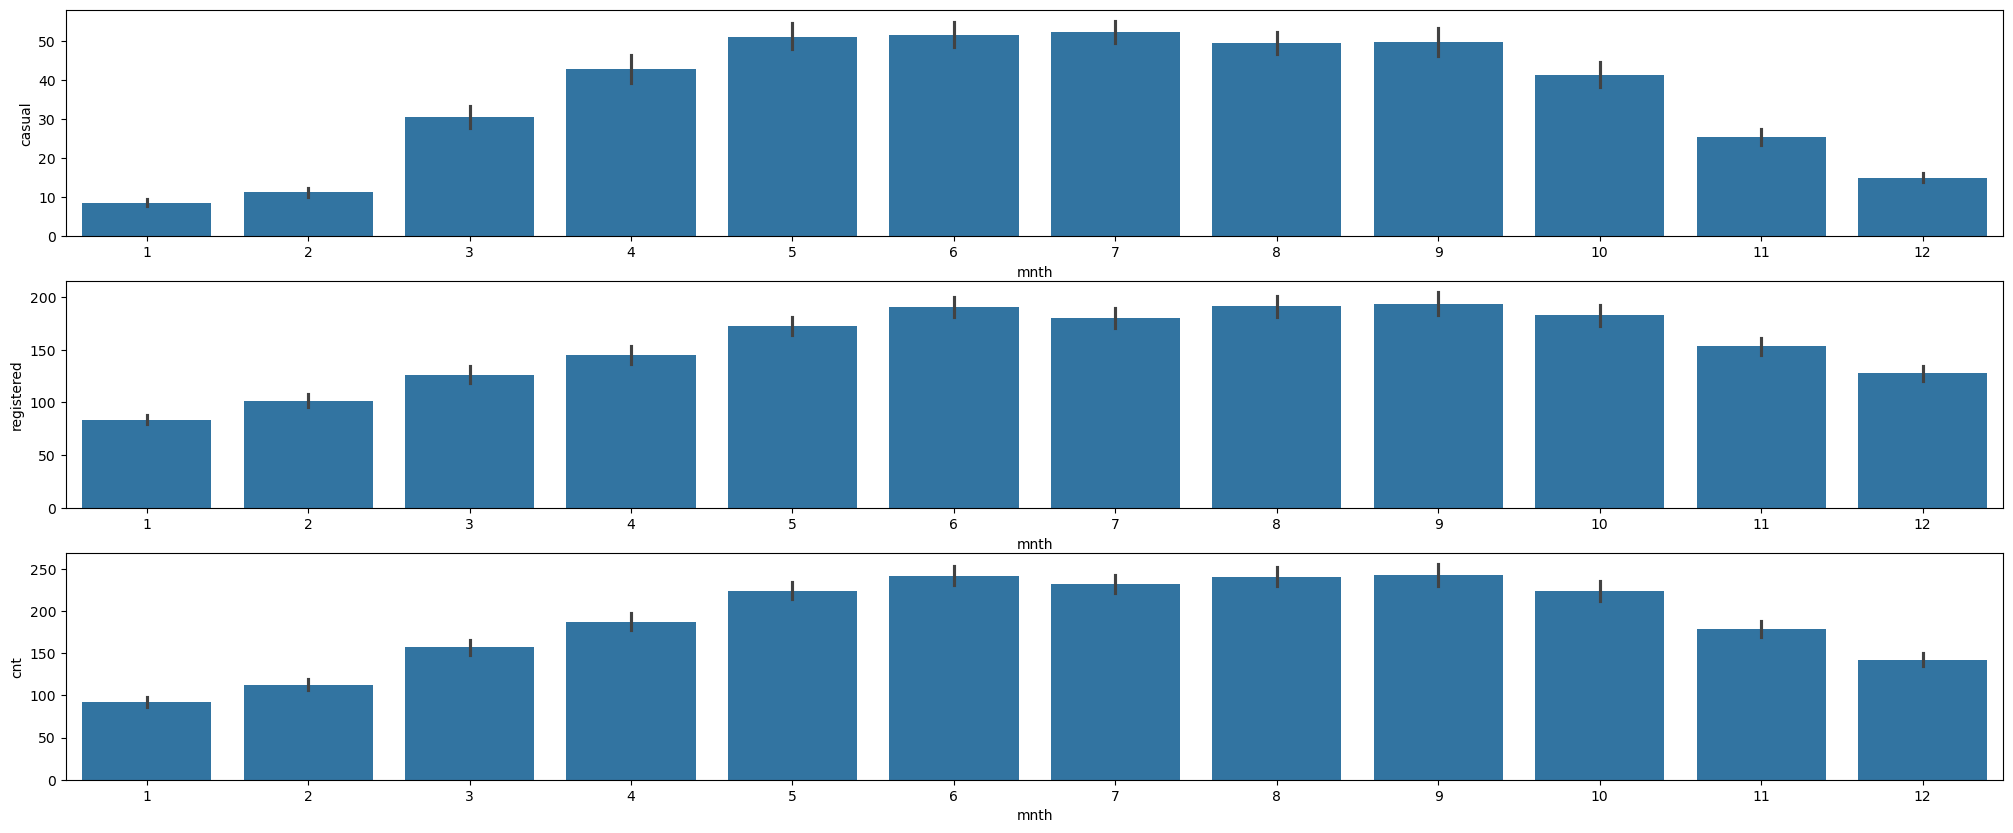

In [20]:
XLcatVisualisationTgt('mnth')

There is definitely a relationship between month and our targets, this indicates to us that month can be a good feature to include in our models. Even if the releationship is not linear, there are ways of using features with nonlinear relationships in linear regression, which we will discuss later.

# Hour

Hour ('hr') is an integer-encoded categorical feature with values ranging from 0 to 23, indicating what hour of the day was registered.

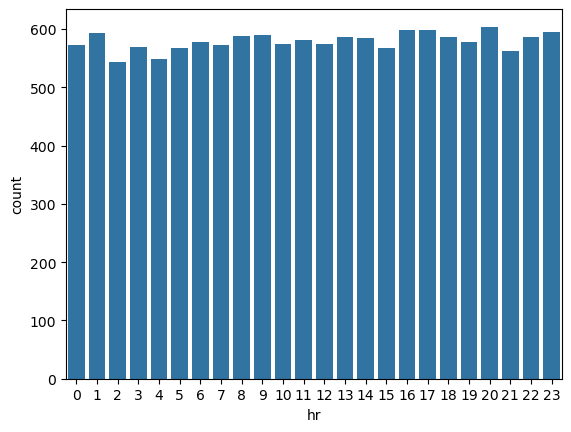

In [21]:
catVisualisation("hr")

The distribution is overall good with a good representation for each category.

We can now proceed to taking a look into the relationship with the target.

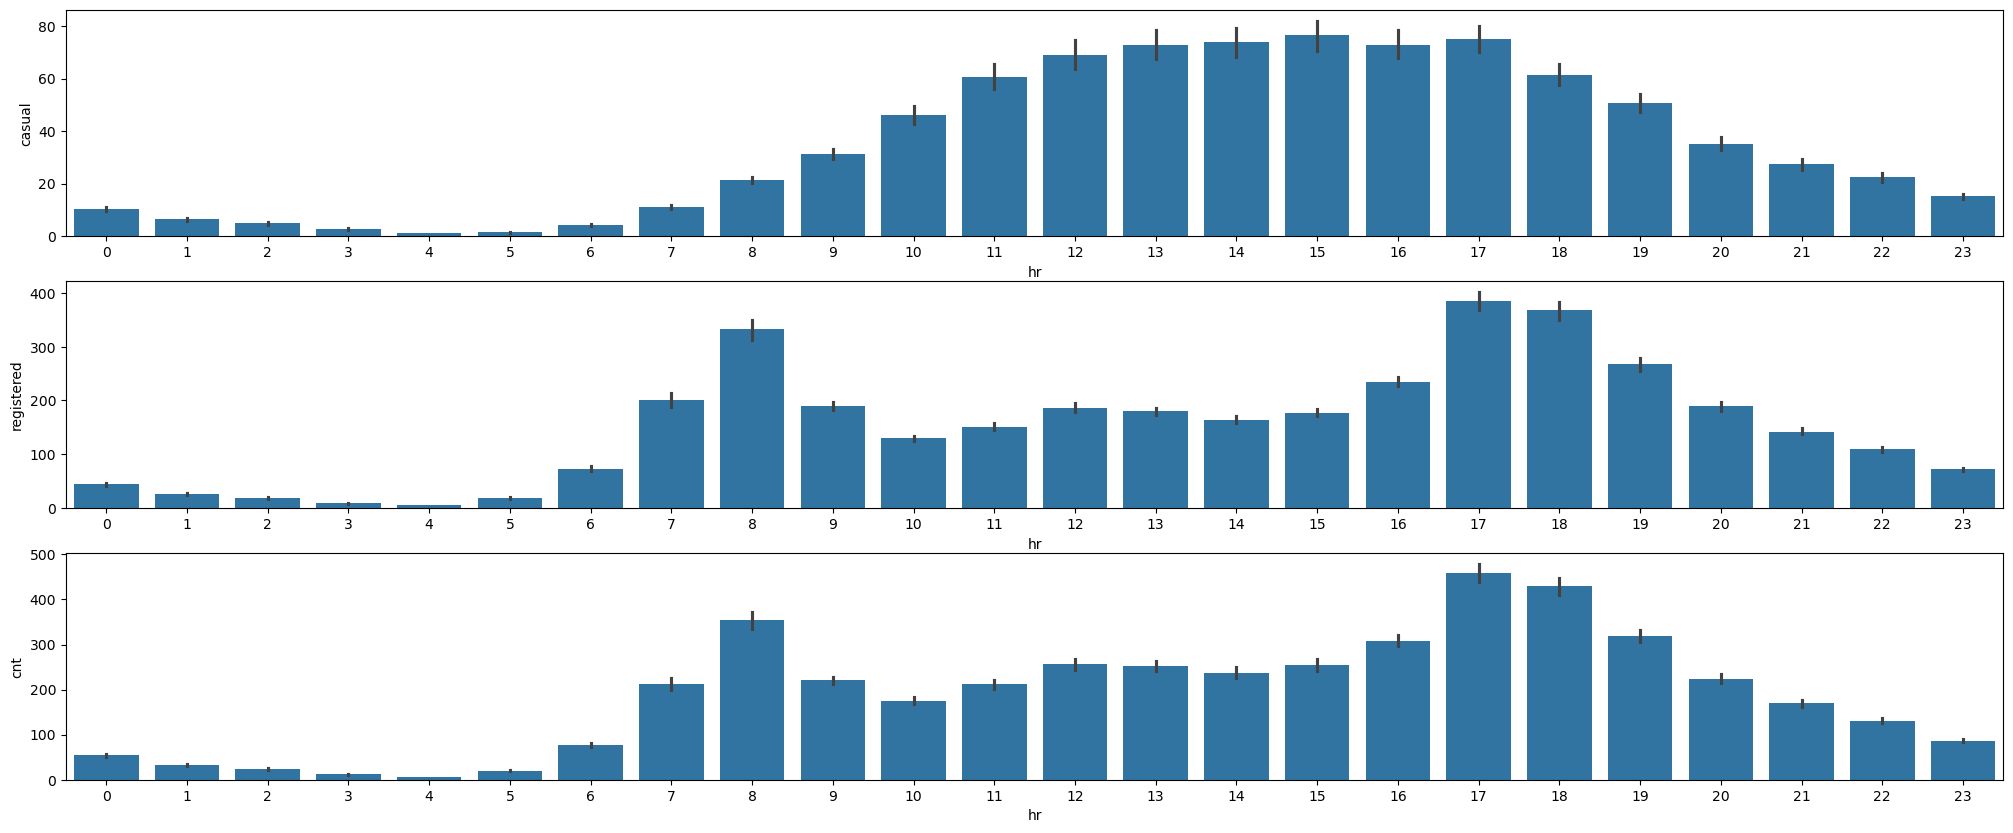

In [22]:
XLcatVisualisationTgt('hr')

For Hour the relationship is a bit more different, but it is still clearly there, especially for registered and total users, but there are still ways of using that data in linear regression.

# Holiday

Holiday is a boolean feature that indicates if the day was or not a holiday.

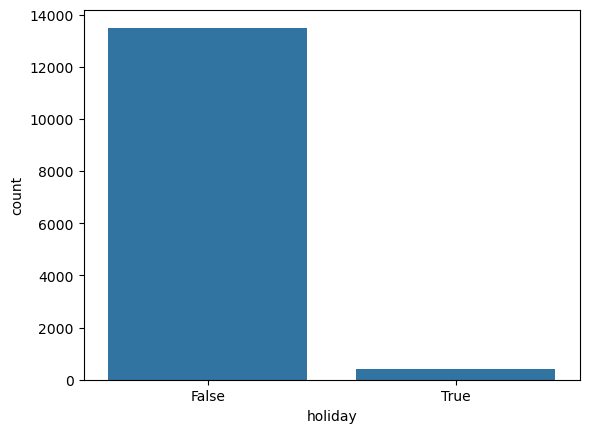

In [23]:
catVisualisation('holiday')

For this feature, the number of True values is way lower than False value, but that should not be a problem.

We can now see the relationship with the targets.

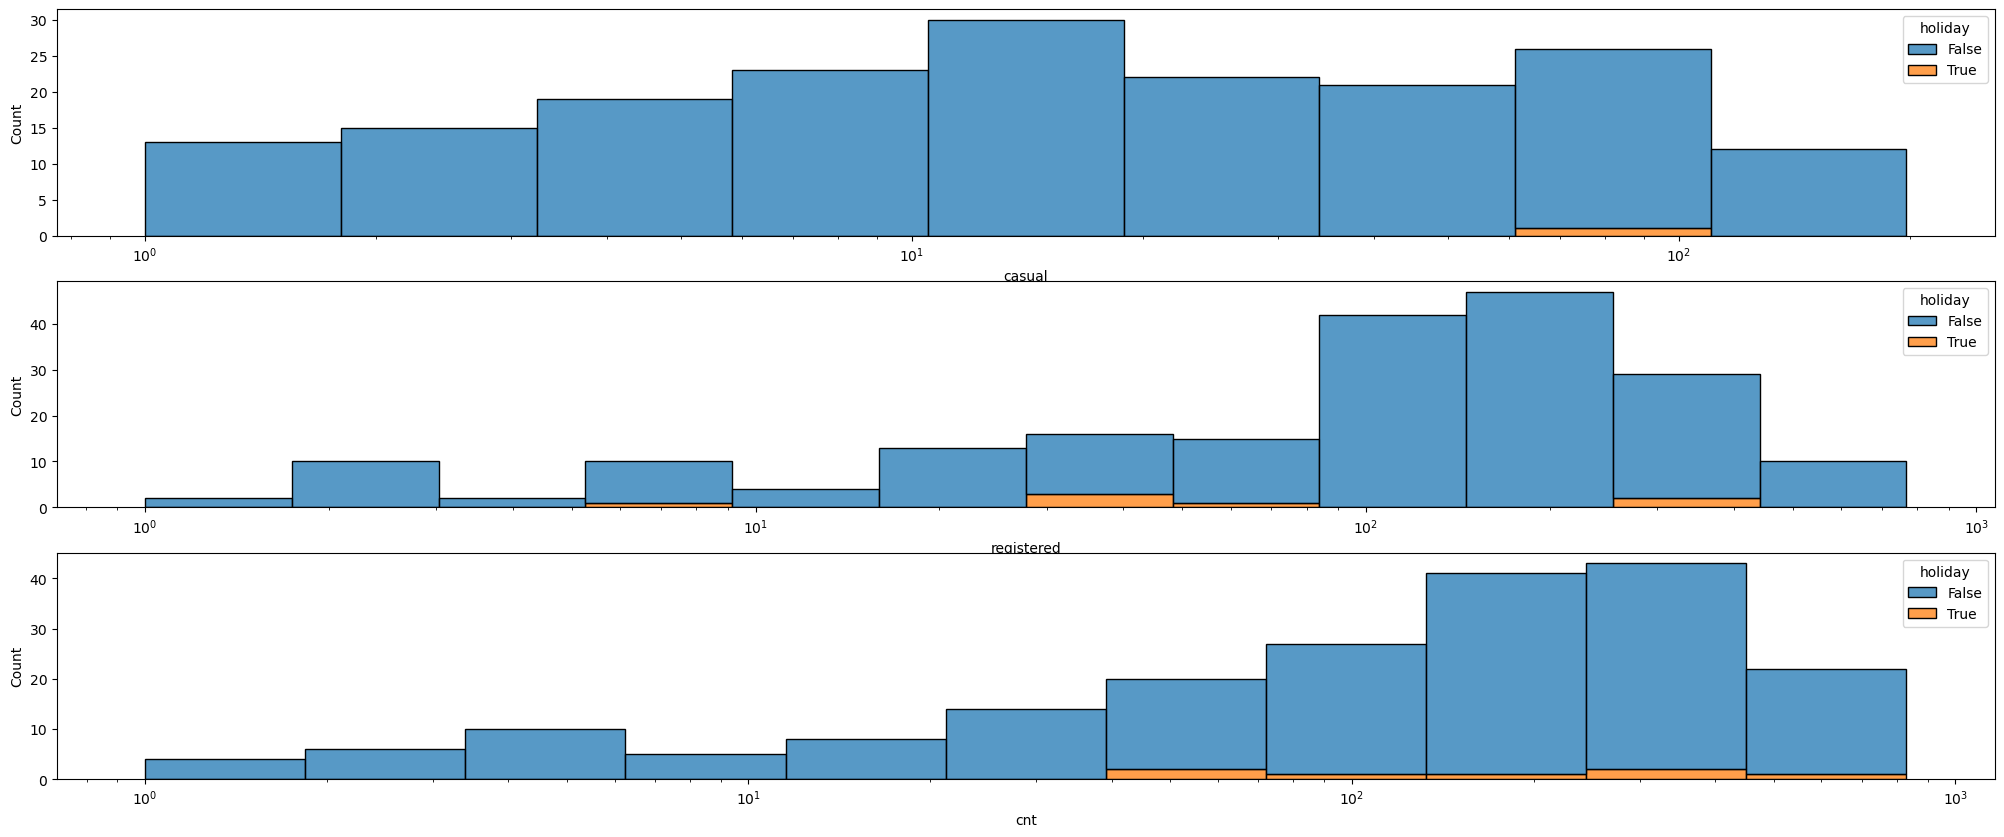

In [24]:
boolVisualisationTgt('holiday')

It is a bit hard to visualise, but there seems to be a larger amount of riders in holidays. We can verify that later with our correlation matrices.

# Weekday

Weekday is a categorical feature, with values ranging from 0 to 6 representing the days of the week.

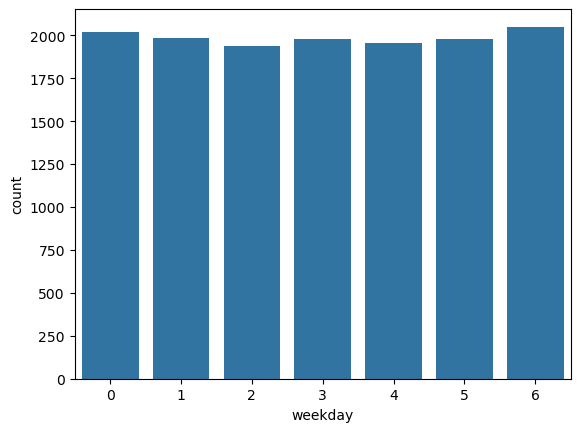

In [25]:
catVisualisation('weekday')

There seems to be a roughly equal distribution, with all weekdays having a bit less than 2000 entries.

Now to visualise the relationship with the targets.

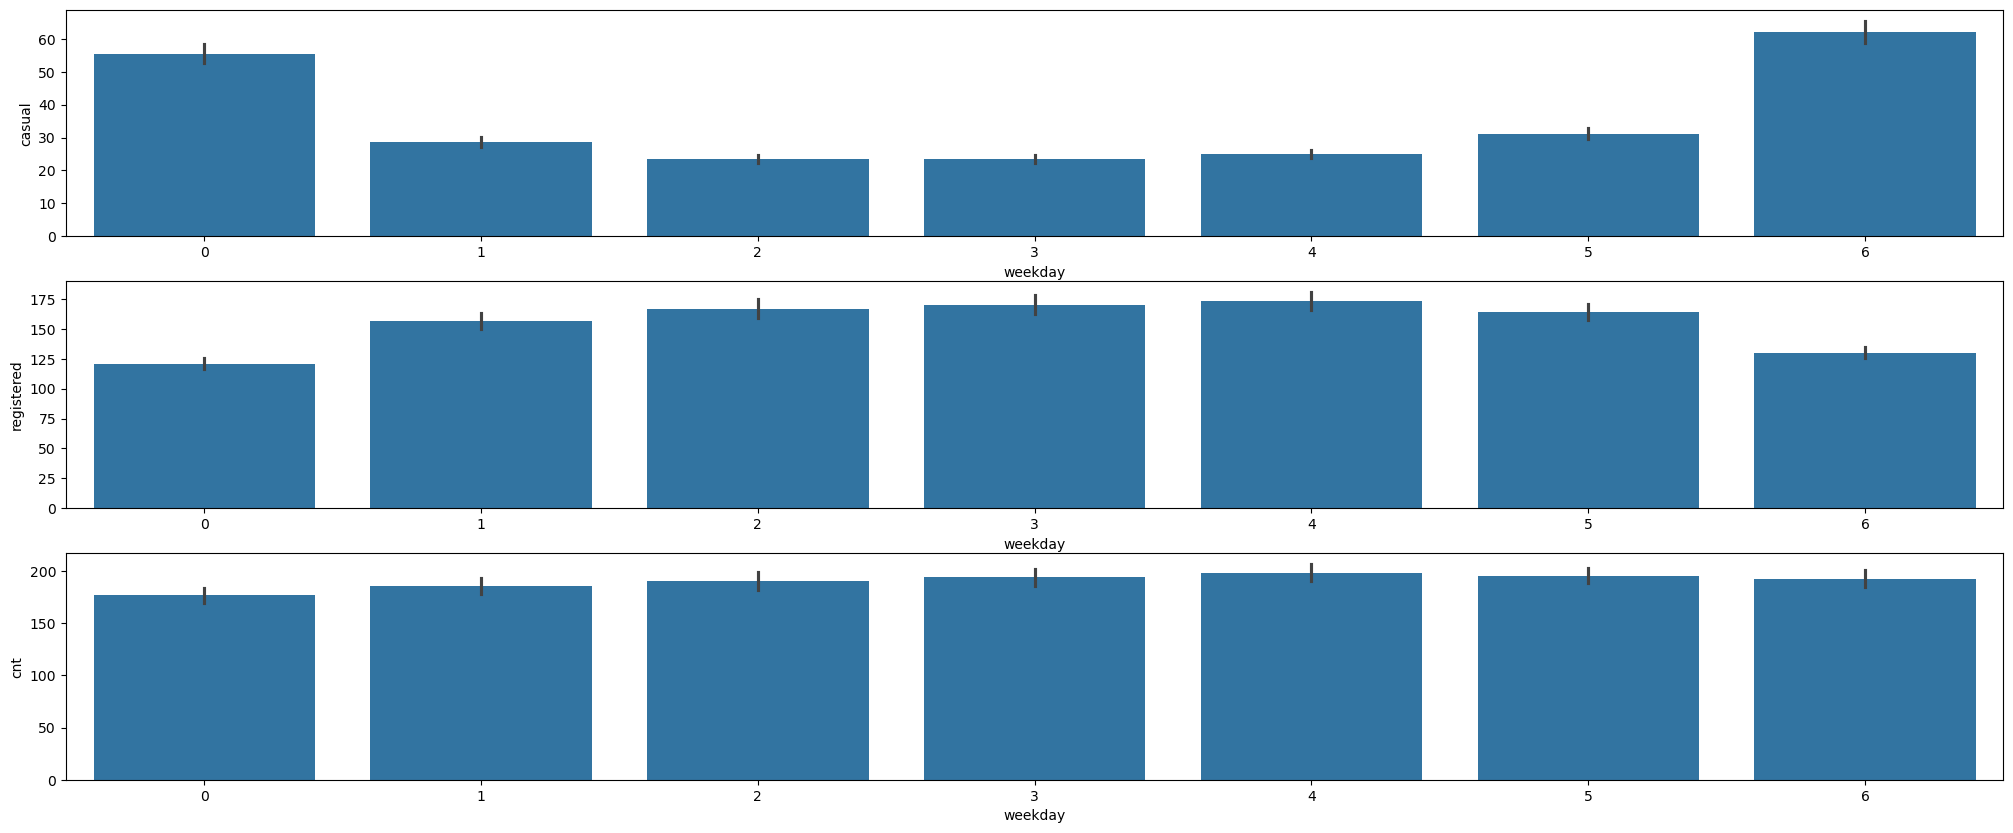

In [26]:
XLcatVisualisationTgt('weekday')

The overall relationship seems to be inverted for casual and registered users, with higher numbers of casual users on days 0 and 6, being Sunday and Saturday, the two days of the weekend, and for registered users the trend is the opposite with more users during the week; unfortunately, that also results in the total count of users being 'flat' in relation to weekday, not showing a lot of variation due to it.

It seems that one option for including this data in our model is to encode it as a boolean feature that indicates if it is a weekday or not, fortunately our dataset already includes this, which we will analyse next.

# Workingday

Workingday is a boolean feature that indicates to us if the day where the measurement was taken was a workday or not.

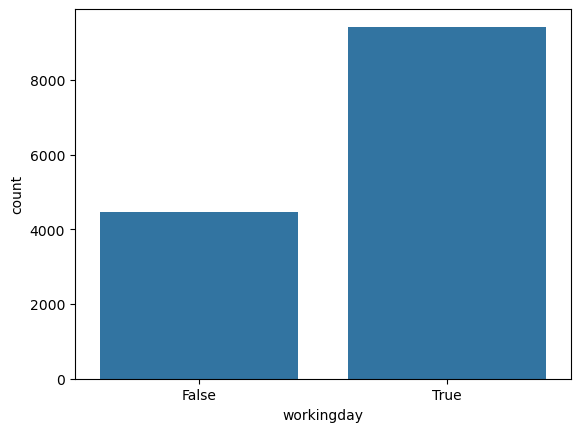

In [27]:
catVisualisation('workingday')

The distribution is as expected with more True observations than false, but that should not be a problem.

We can take a look at its relationship to the targets now, to see if deriving that information from the weekday data was useful to us.

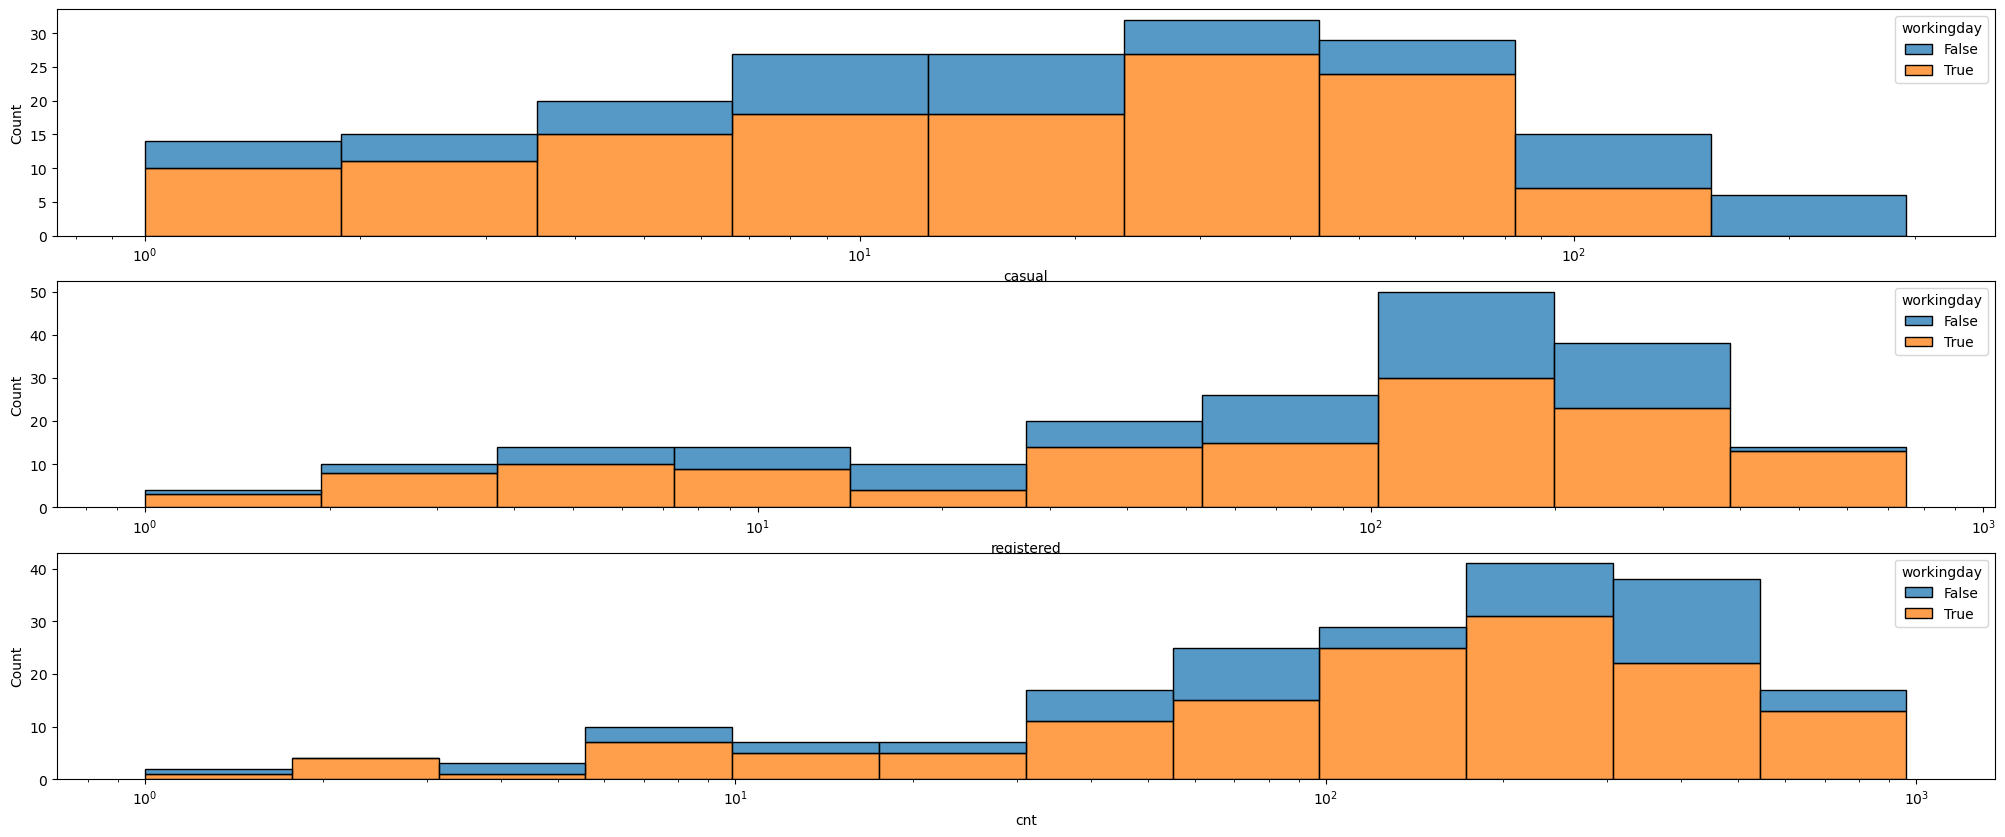

In [28]:
boolVisualisationTgt('workingday')

As expected, there seems to be more False values with higher entries for casual users. Additionally, for registered users the relationship seems to be the opposite, which confirms our earlier observations, there also doesn't seem to be a strong relationship between it and the total count, as we observed earlier

# Weather situation

Weathersit is an integer-encoded categorical feature that indicates what the weather was like when the measurement was taken.

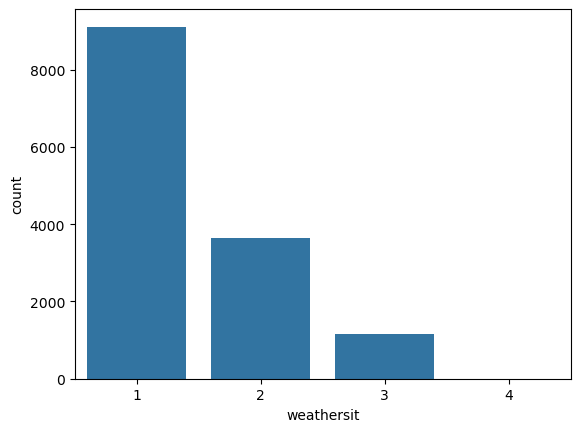

In [29]:
catVisualisation('weathersit')

There seems to be a smaller number of observations for 'higher' values of weathersit, but that should not be a problem.

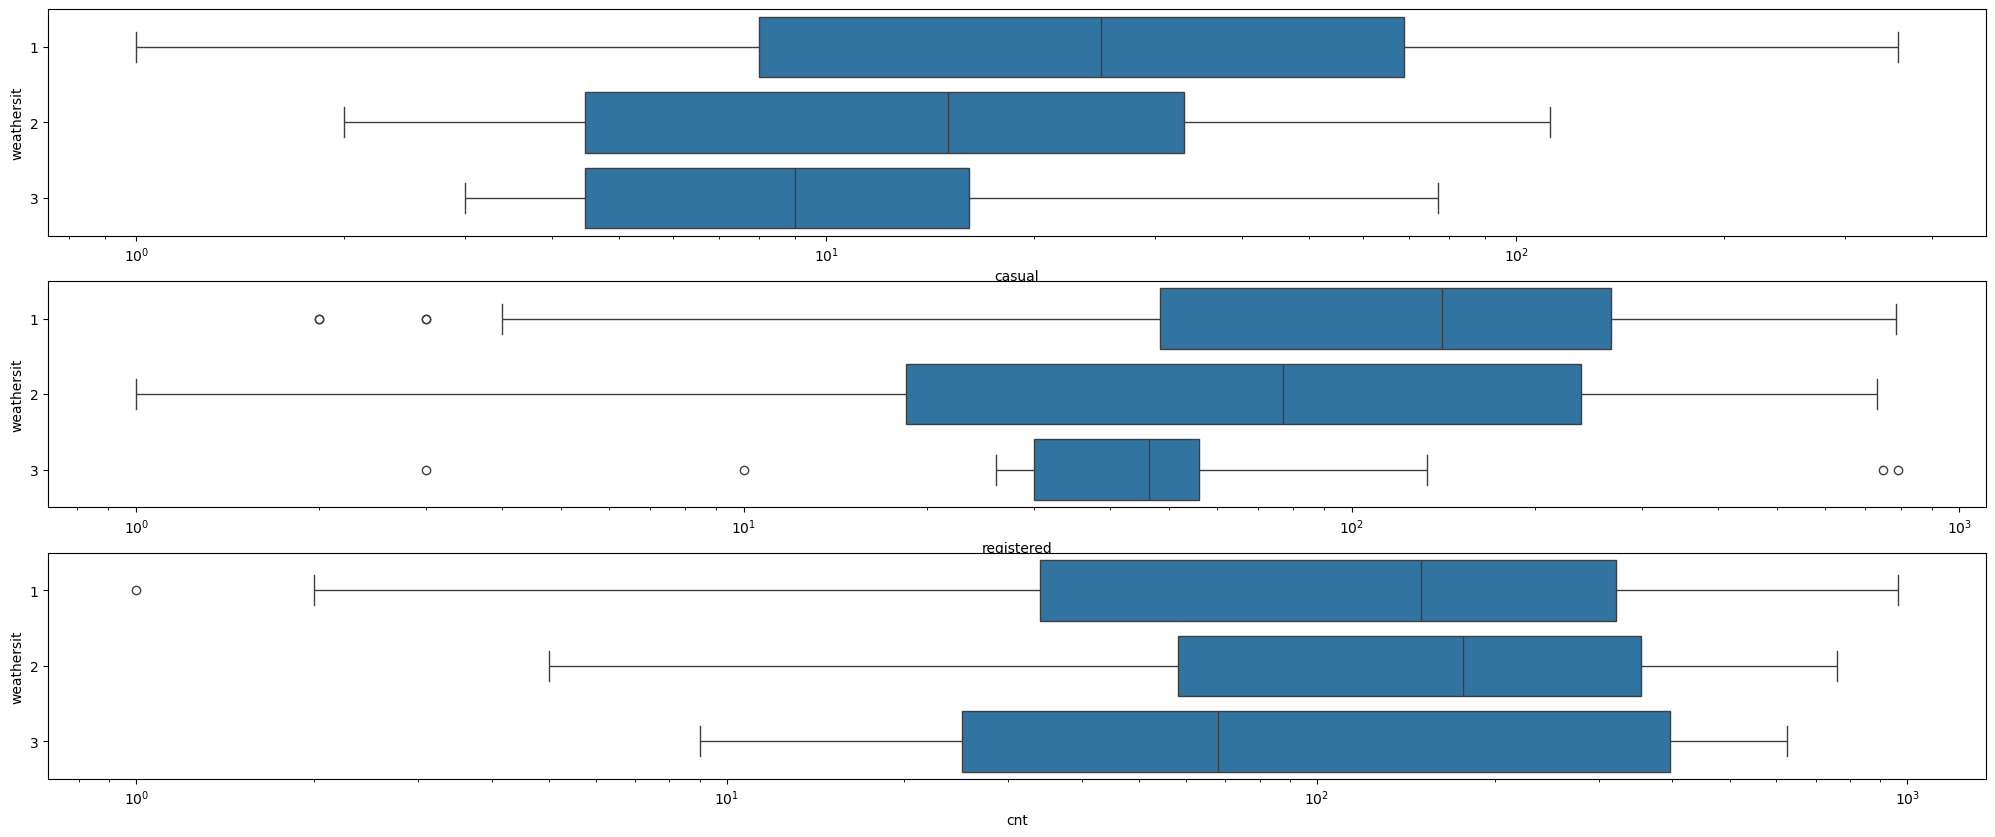

In [30]:
catVisualisationTgt('weathersit') # there are very few entries with value 4 so due to sampling we will most likely not get them in our visualisations

There seems to be an overall inverse linear relationship with the targets, with more riders on lower values of weather, that makes sense, as people are less likely to take a bike during more extreme weather.

We can use a regplot to try and visualise that relationship.

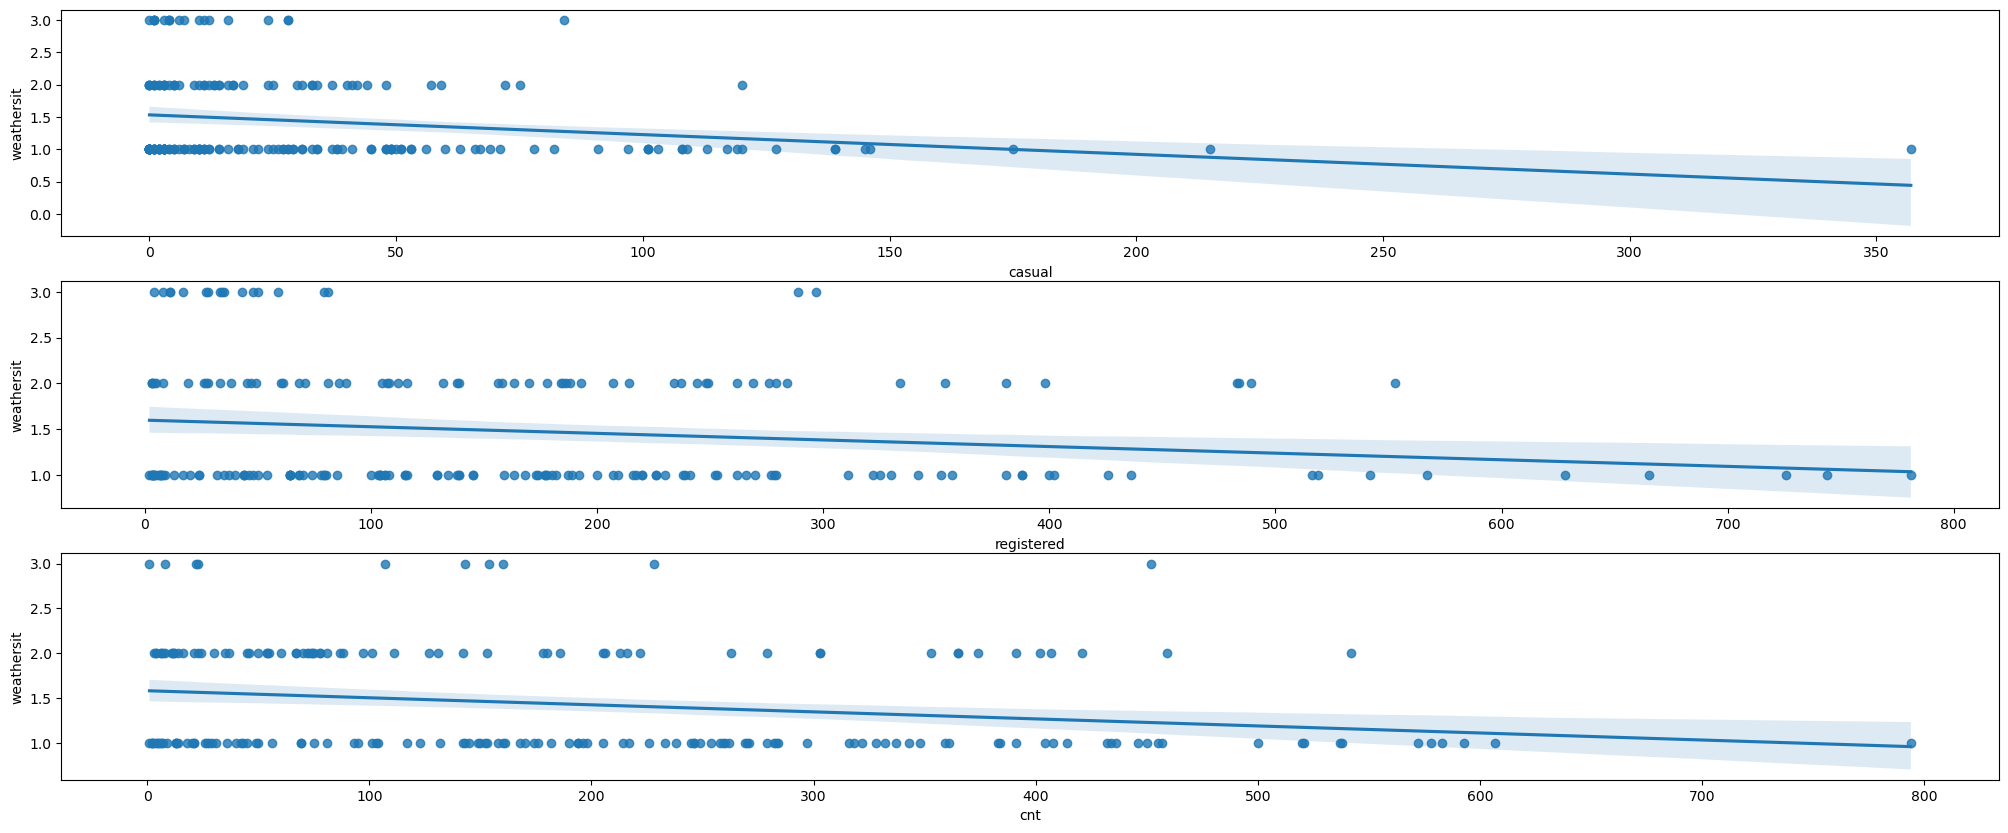

In [31]:
numVisualisationTgt('weathersit')

As can be seem with the regplot that relationship does indeed seem to exist, that indicates to us that weathersit probably is a good feature to include in our models.

# Temperature

Temperature is a numerical feature representing the normalized temperature in Celsius.

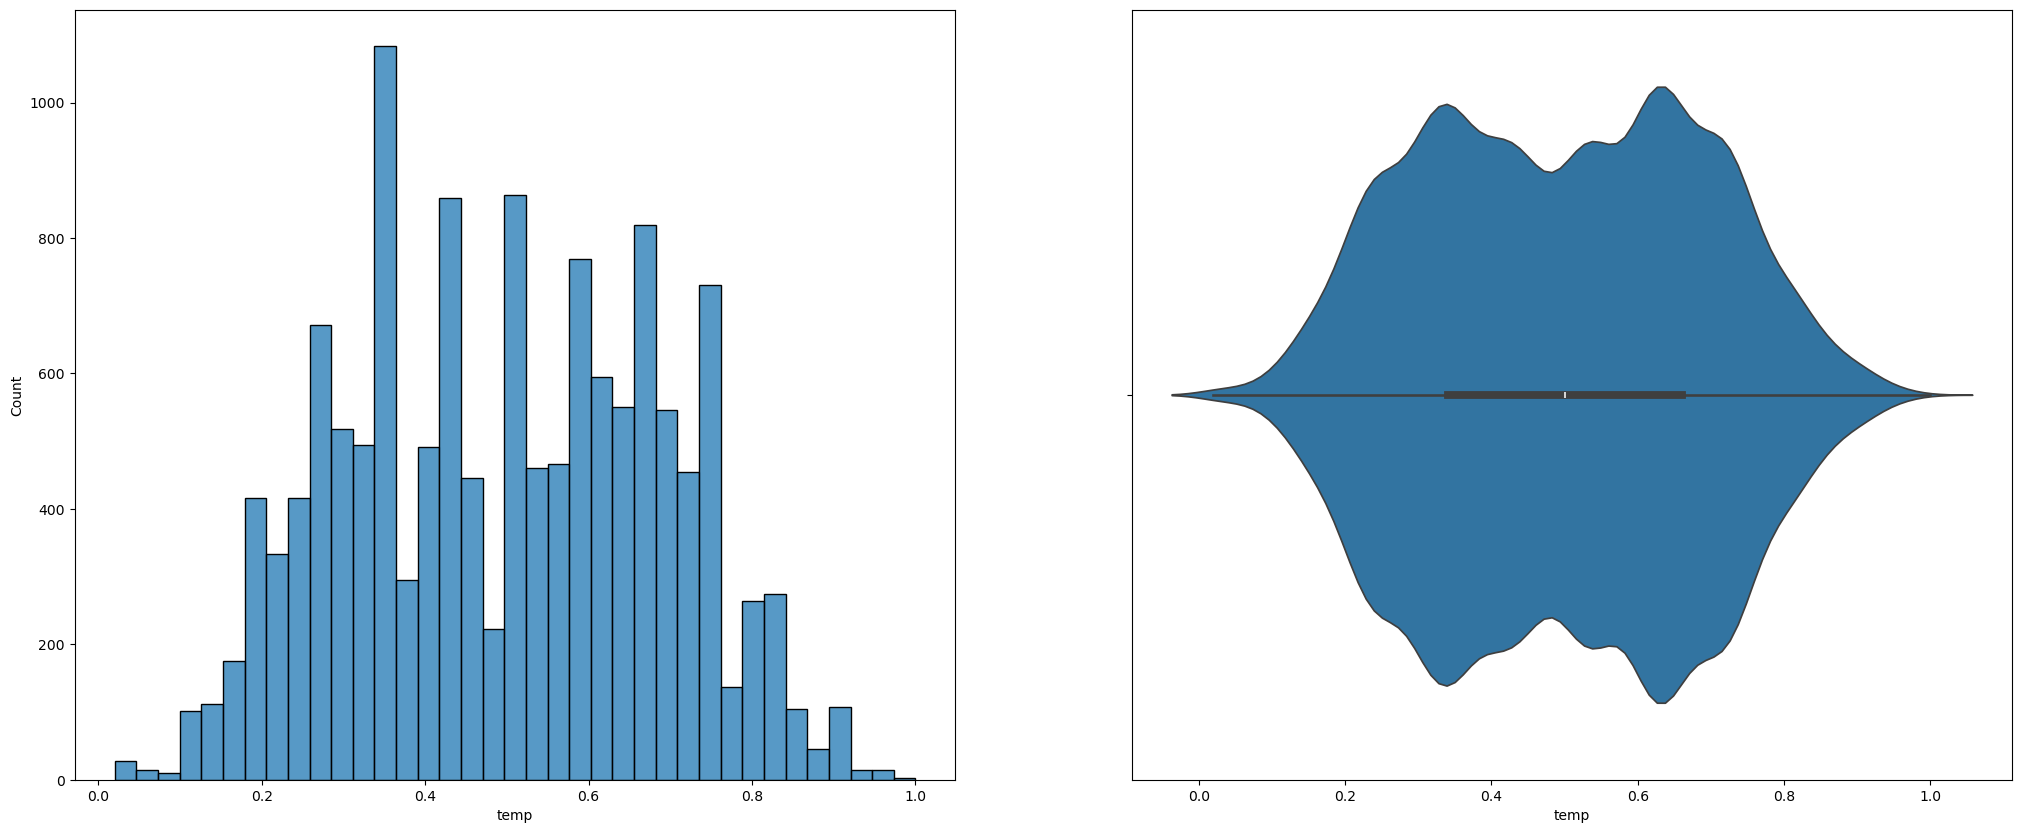

In [32]:
numVisualisation('temp')

The data roughly follows a normal distribution, and there does not seme to be any ouliers, so we can just proceed to visualising the relationship with the targets.

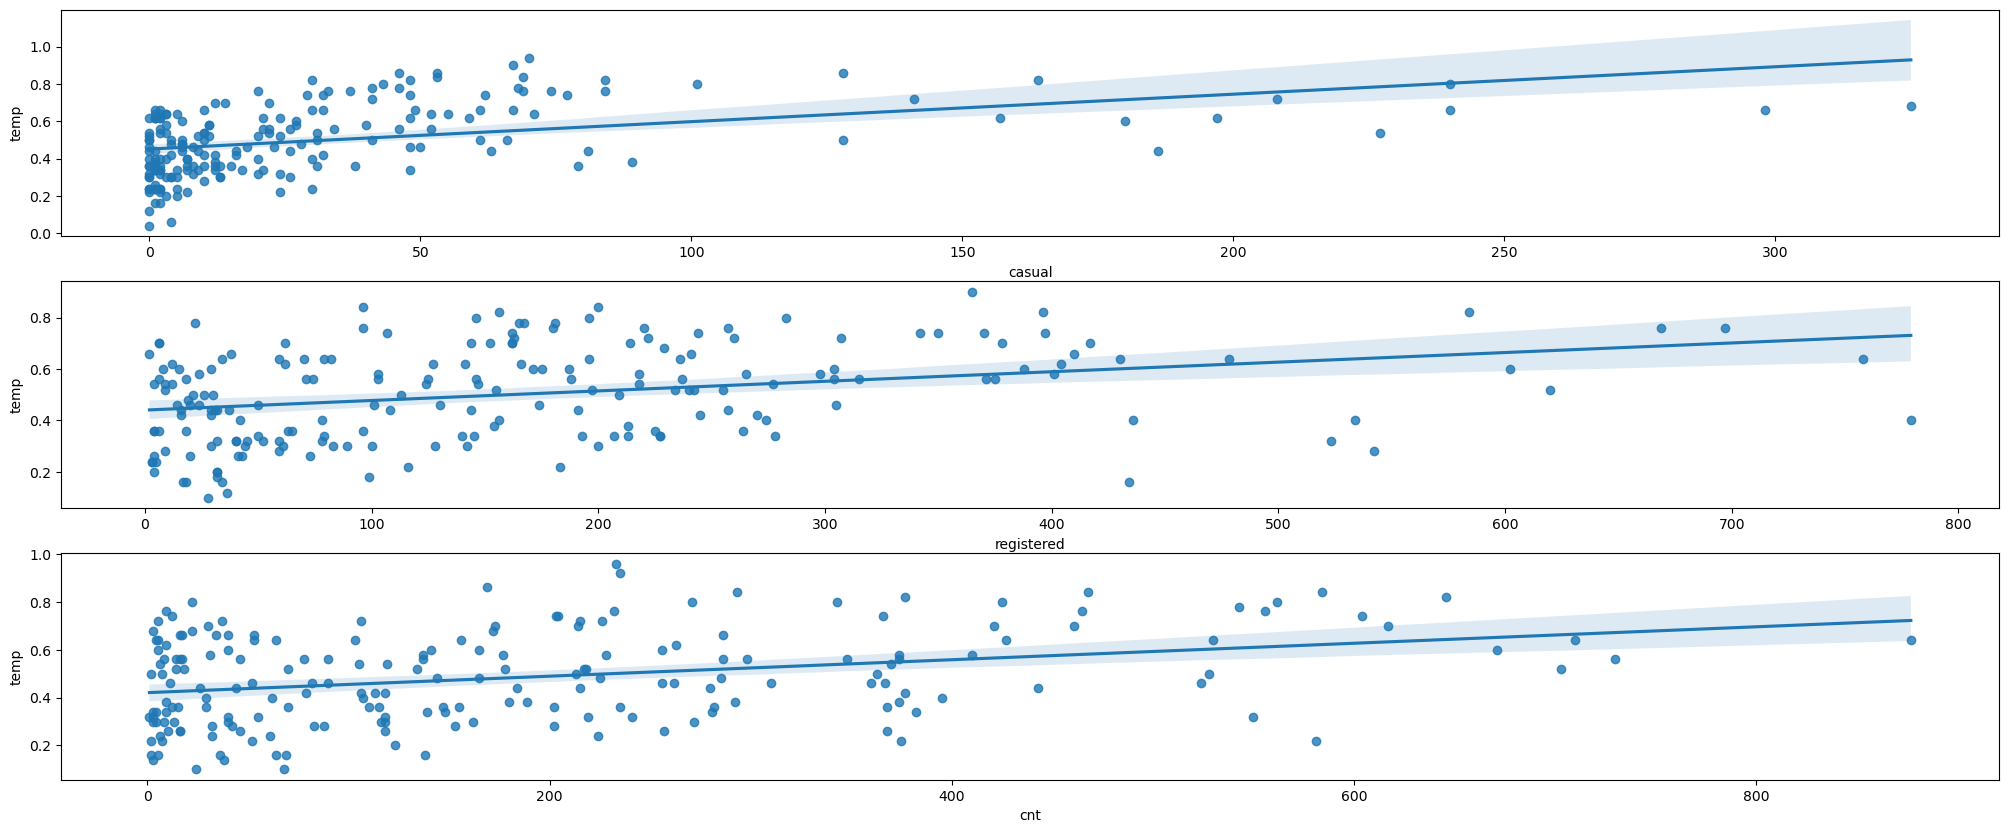

In [33]:
numVisualisationTgt('temp')

This feature seems to have an almost ideal linear relationship to all our targets, that is great and indicates to us that temperature will probably be one of the best predictors in our model, especially the linear regression ones.

# Feeling temperature

Atemp is a numerical feature that represents the normalized feeling temperature in degrees Celsius.

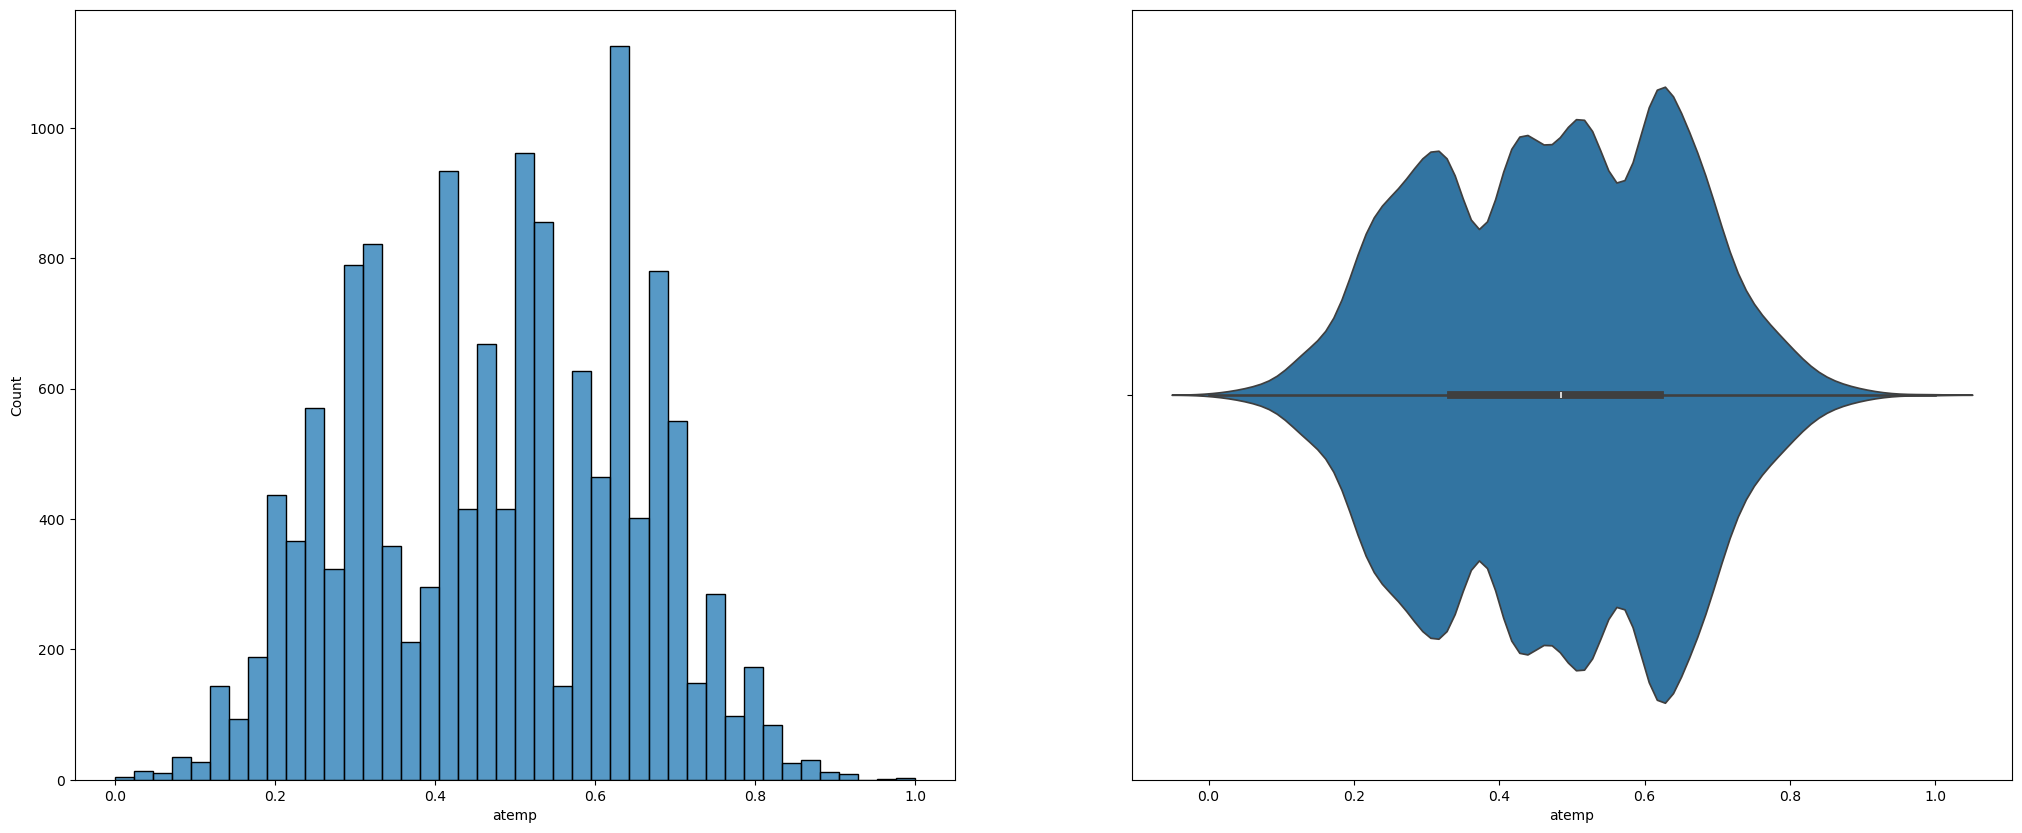

In [34]:
numVisualisation('atemp')

This feature seems to also have a distribution close to normal and no outliers, that is great and means we can just move on to analysing the relationship with the target.

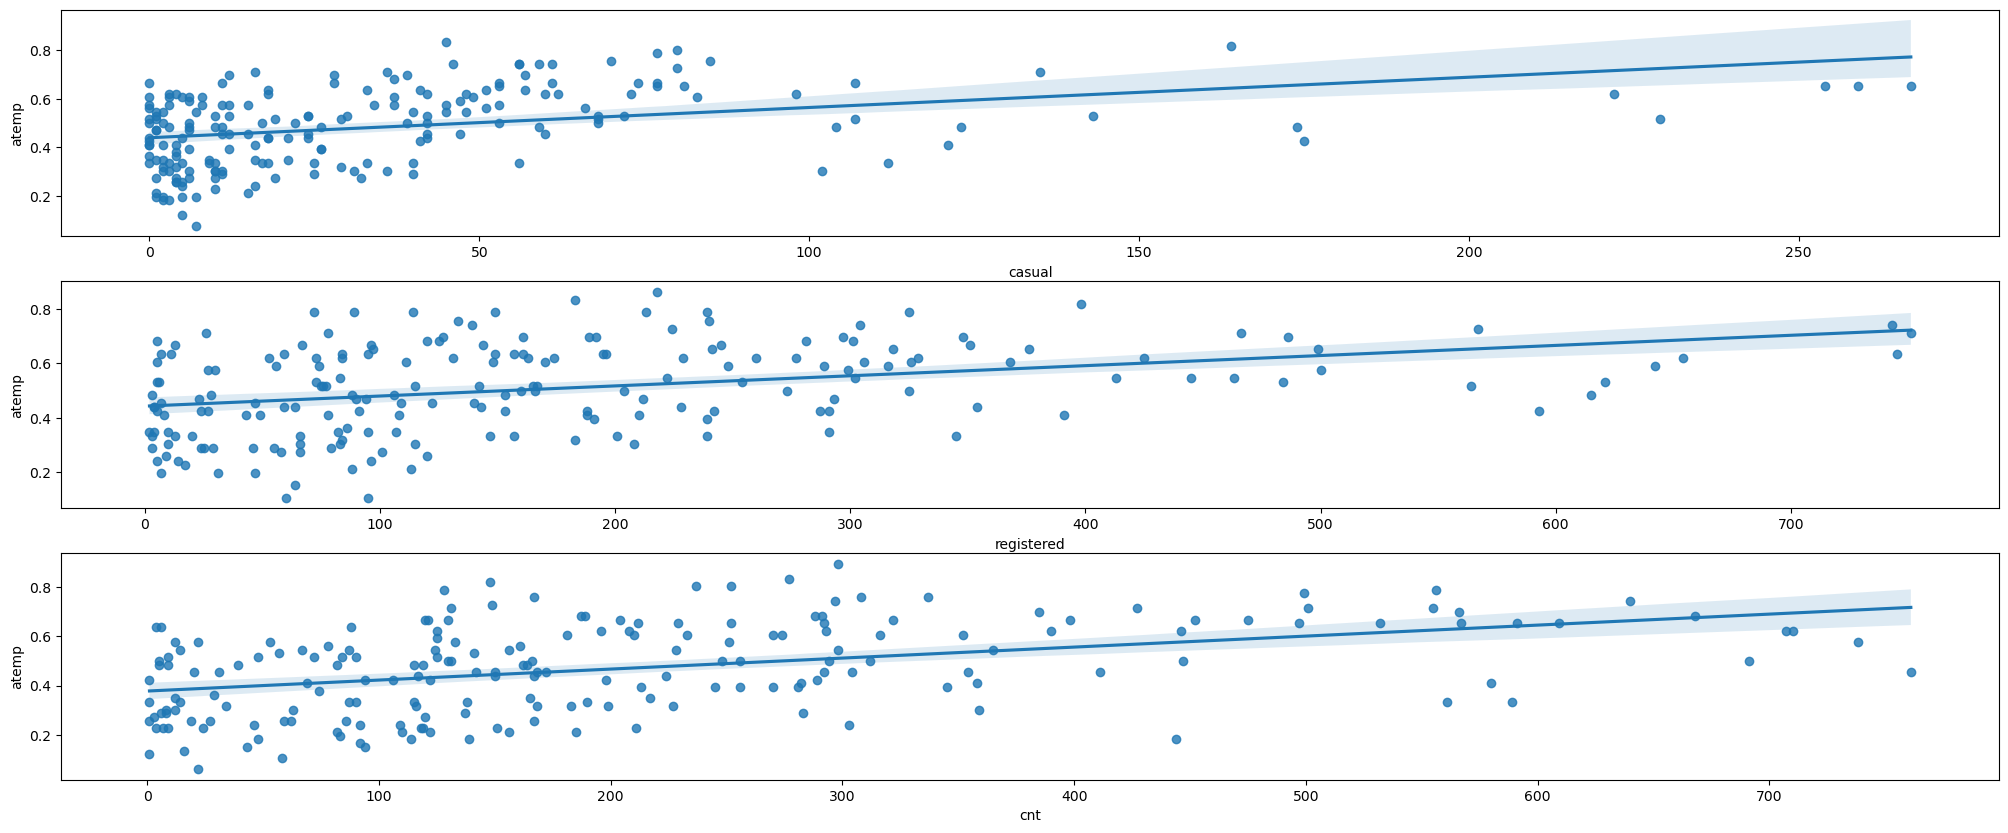

In [35]:
numVisualisationTgt('atemp')

There also seems to be a string linear relationship between atemp and our feature, however it is very likely that it is closely related to temperature, humidity, and windspeed, so we need to check that too.

<Axes: xlabel='windspeed', ylabel='atemp'>

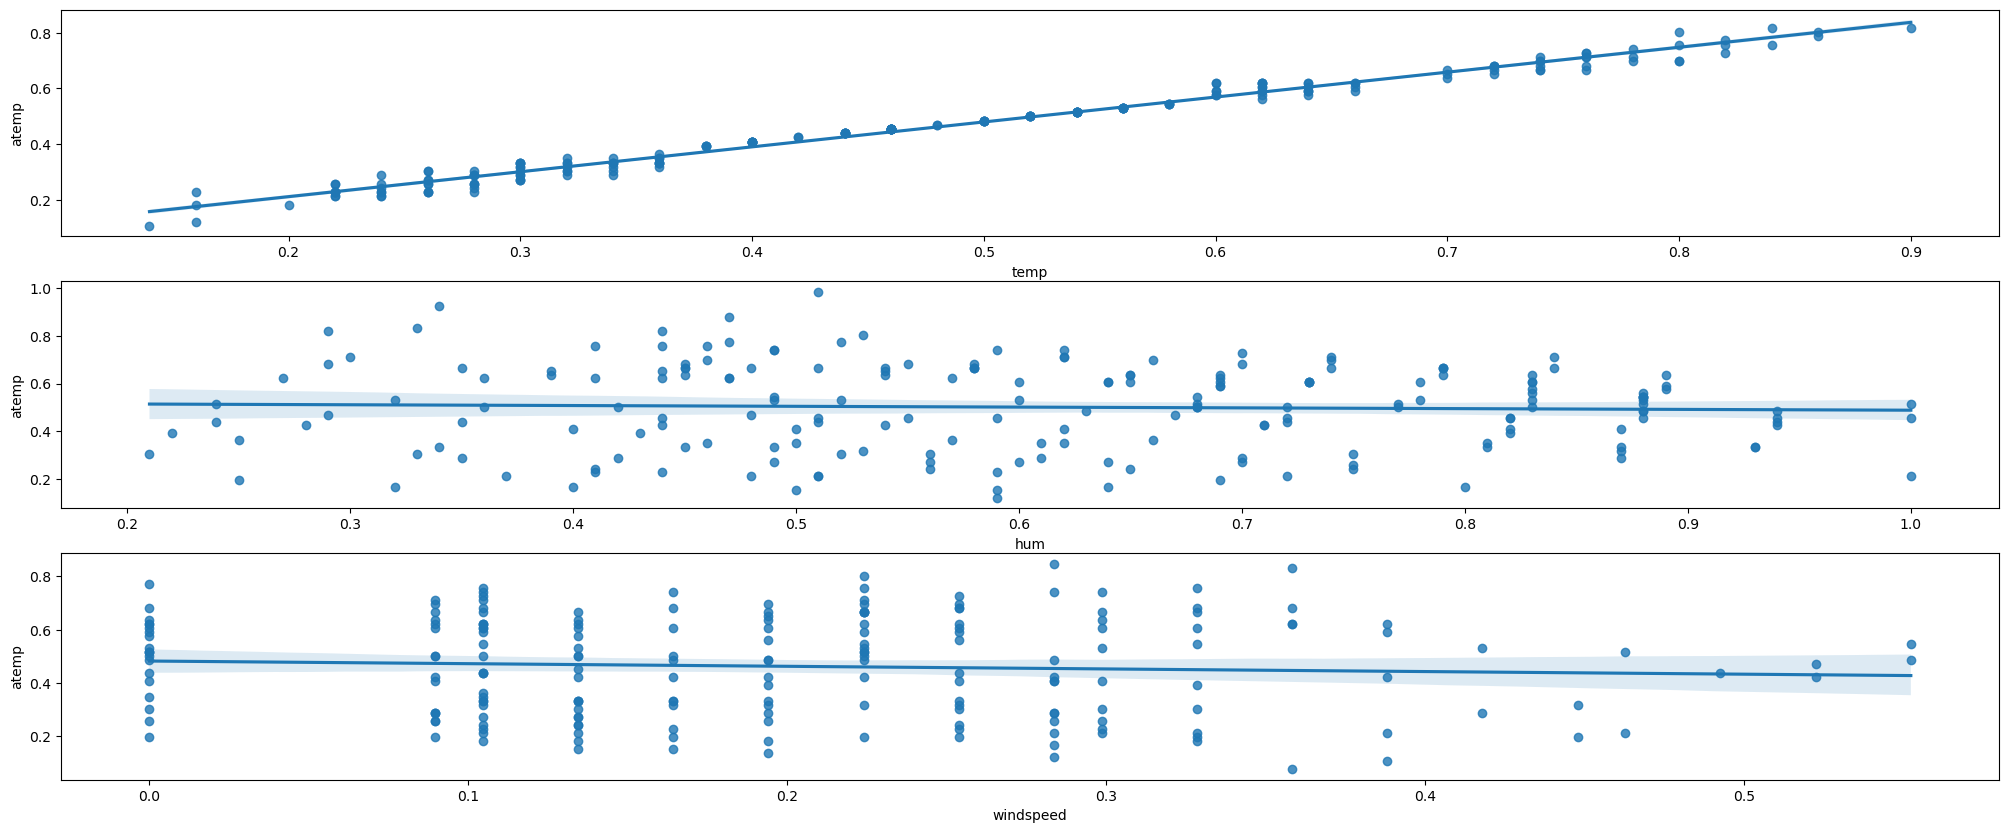

In [36]:
fig, axes = plt.subplots(3,1, figsize=(25, 10))
sns.regplot(data=train_data.sample(200),x='temp',y= 'atemp',ax=axes[0])
sns.regplot(data=train_data.sample(200),x='hum',y= 'atemp',ax=axes[1])
sns.regplot(data=train_data.sample(200),x='windspeed',y= 'atemp',ax=axes[2])

There seems to be an extremely close linear relationship between temp and atemp, that indicates to us that we should not use both of them in the same model as to not overrepresent any feature, however, the relationship with windspeed and humidity is very weak, but still existing, there are ways of dealing with that such as averaging the two values together, but since they are so closely related and report the same data, I decided its best to just drop it from our dataset.

In [37]:
train_data.drop('atemp',axis=1,inplace=True)
test_data.drop('atemp',axis=1,inplace=True)

train_data.head()

,instant,season,is_yr_one,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
11030,11031,2,True,4,18,False,1,True,1,0.54,0.34,0.2985,60,586,646
2175,2176,2,False,4,12,False,2,True,2,0.34,0.71,0.3881,6,32,38
7240,7241,4,False,11,7,False,4,True,2,0.32,0.81,0.0896,12,280,292
8655,8656,1,True,1,10,False,0,False,1,0.30,0.81,0.1045,18,52,70
16545,16546,4,True,11,3,False,2,True,3,0.32,0.70,0.1343,1,3,4


# Humidity

Hum is a numerical feature that represents the humidity when the measurement was taken.

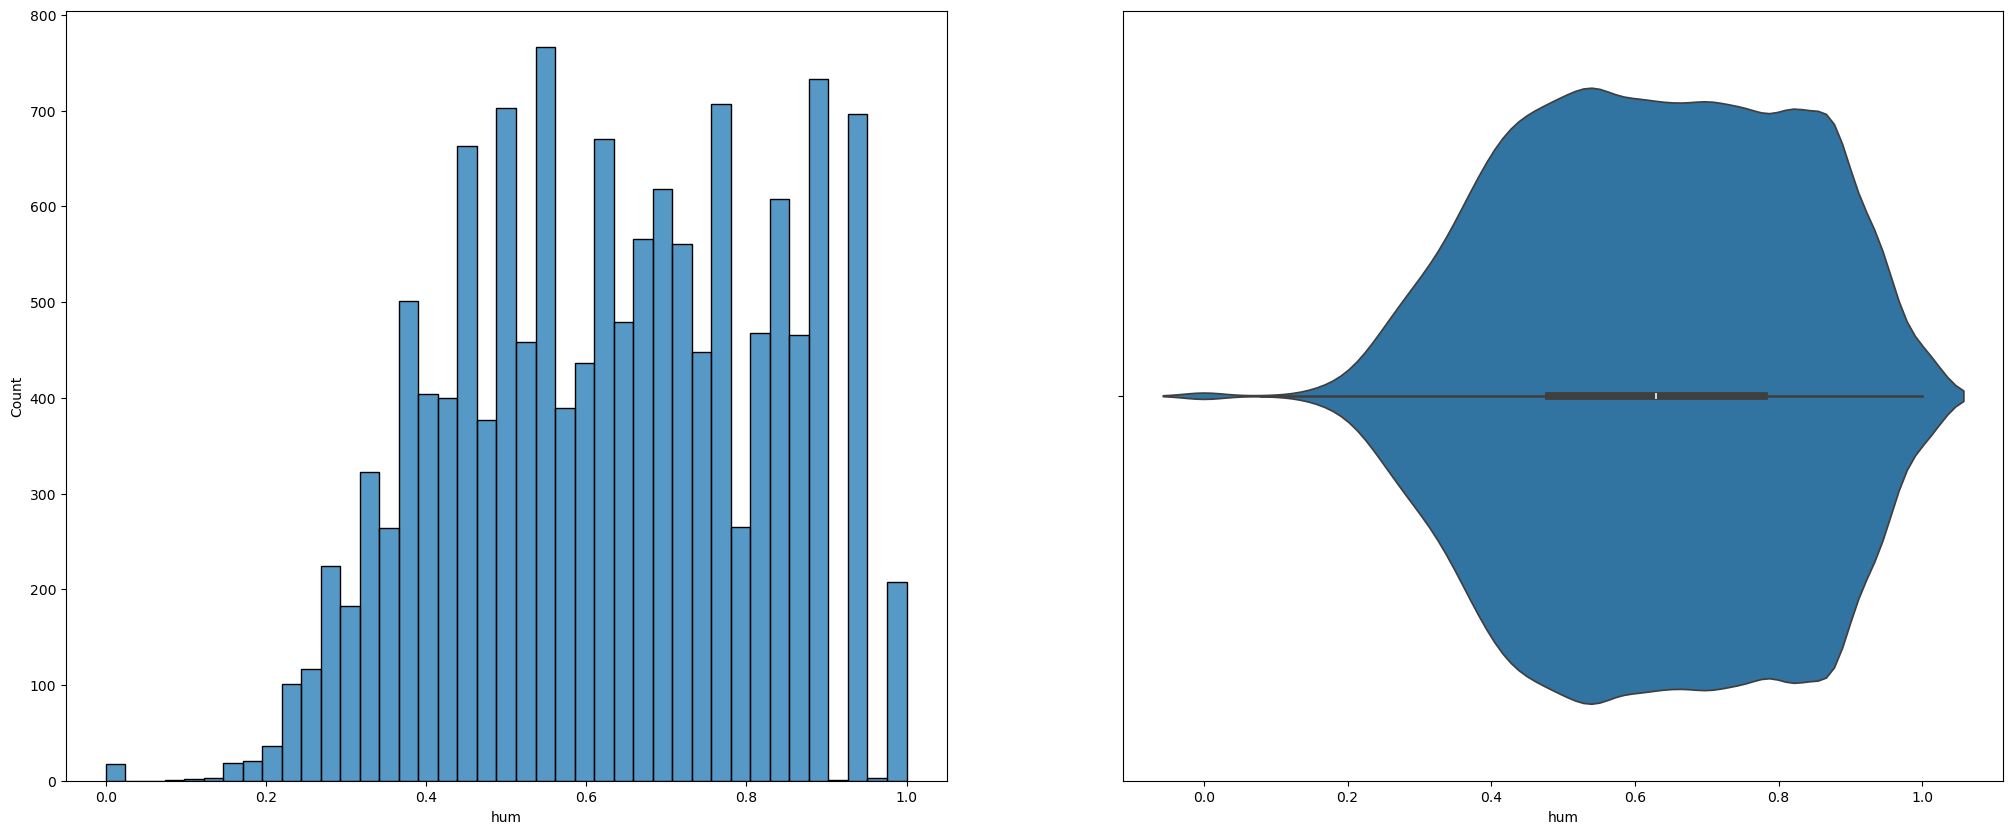

In [38]:
numVisualisation('hum')

The overall distribution seems to be something close to a normal distribution, there aren't any outliers, so we can just proceed to analysing the relationship to the target.

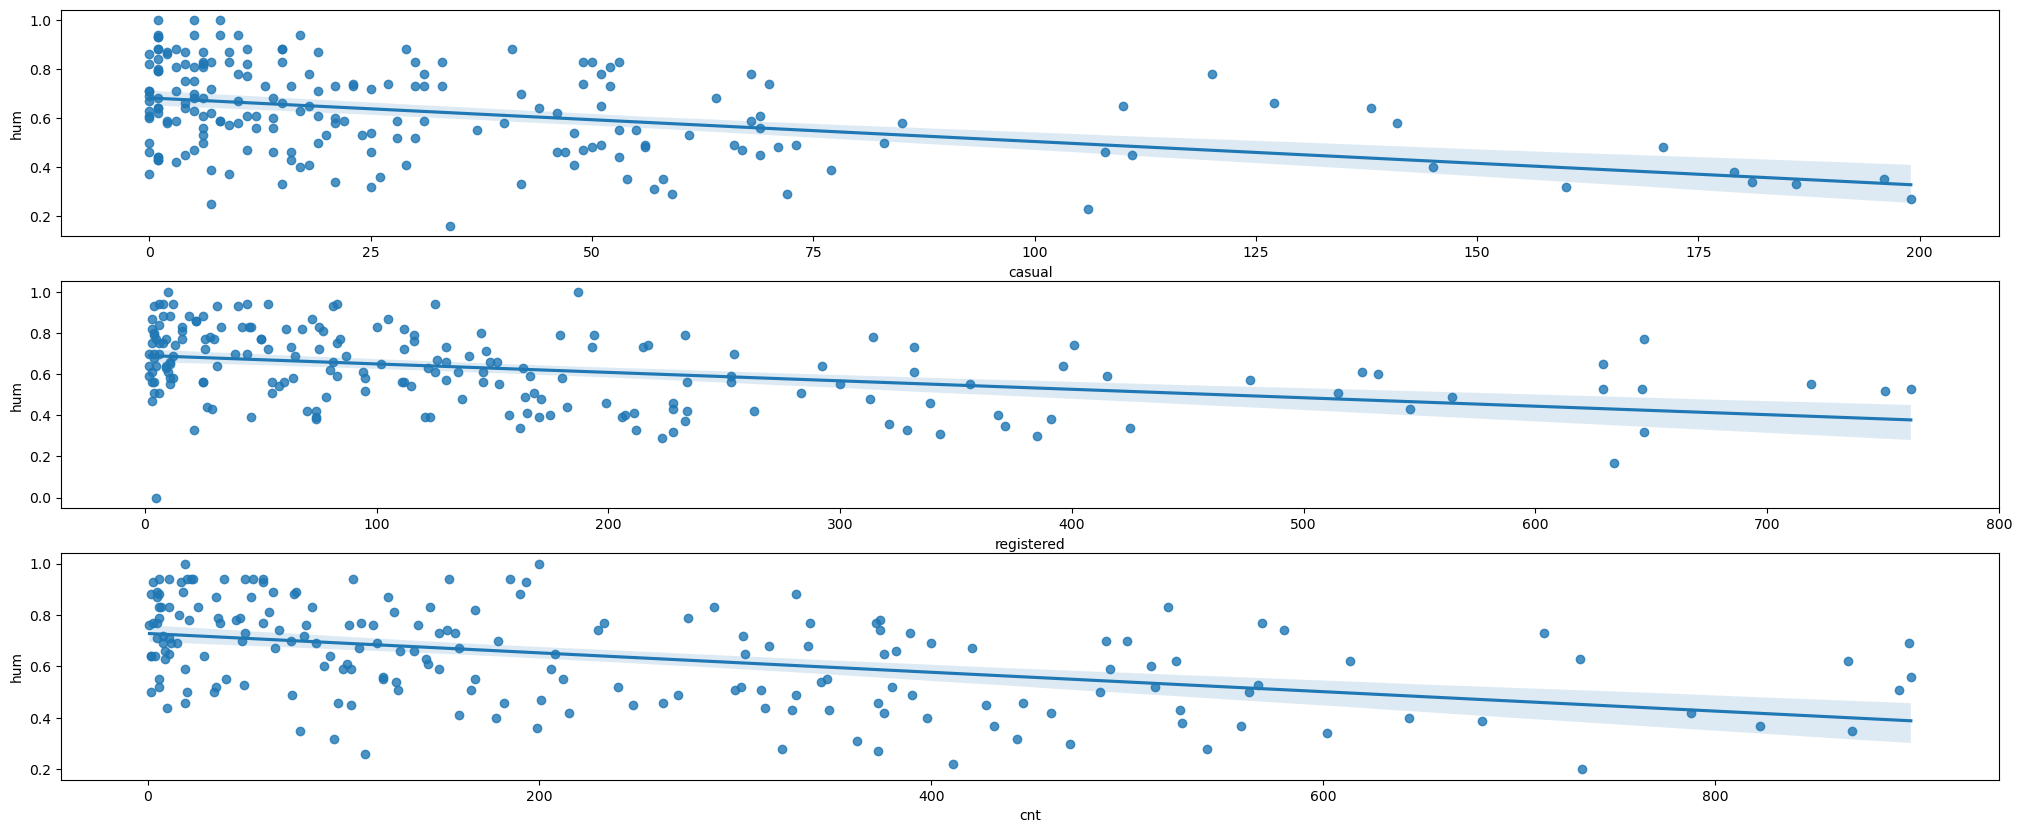

In [39]:
numVisualisationTgt('hum')

There is a very strong linear relationship between hum and our targets, with higher humidity values having lower values for all targets.

# Windspeed

Windspeed is a numerical feature that represents the normalized wind speeds. 

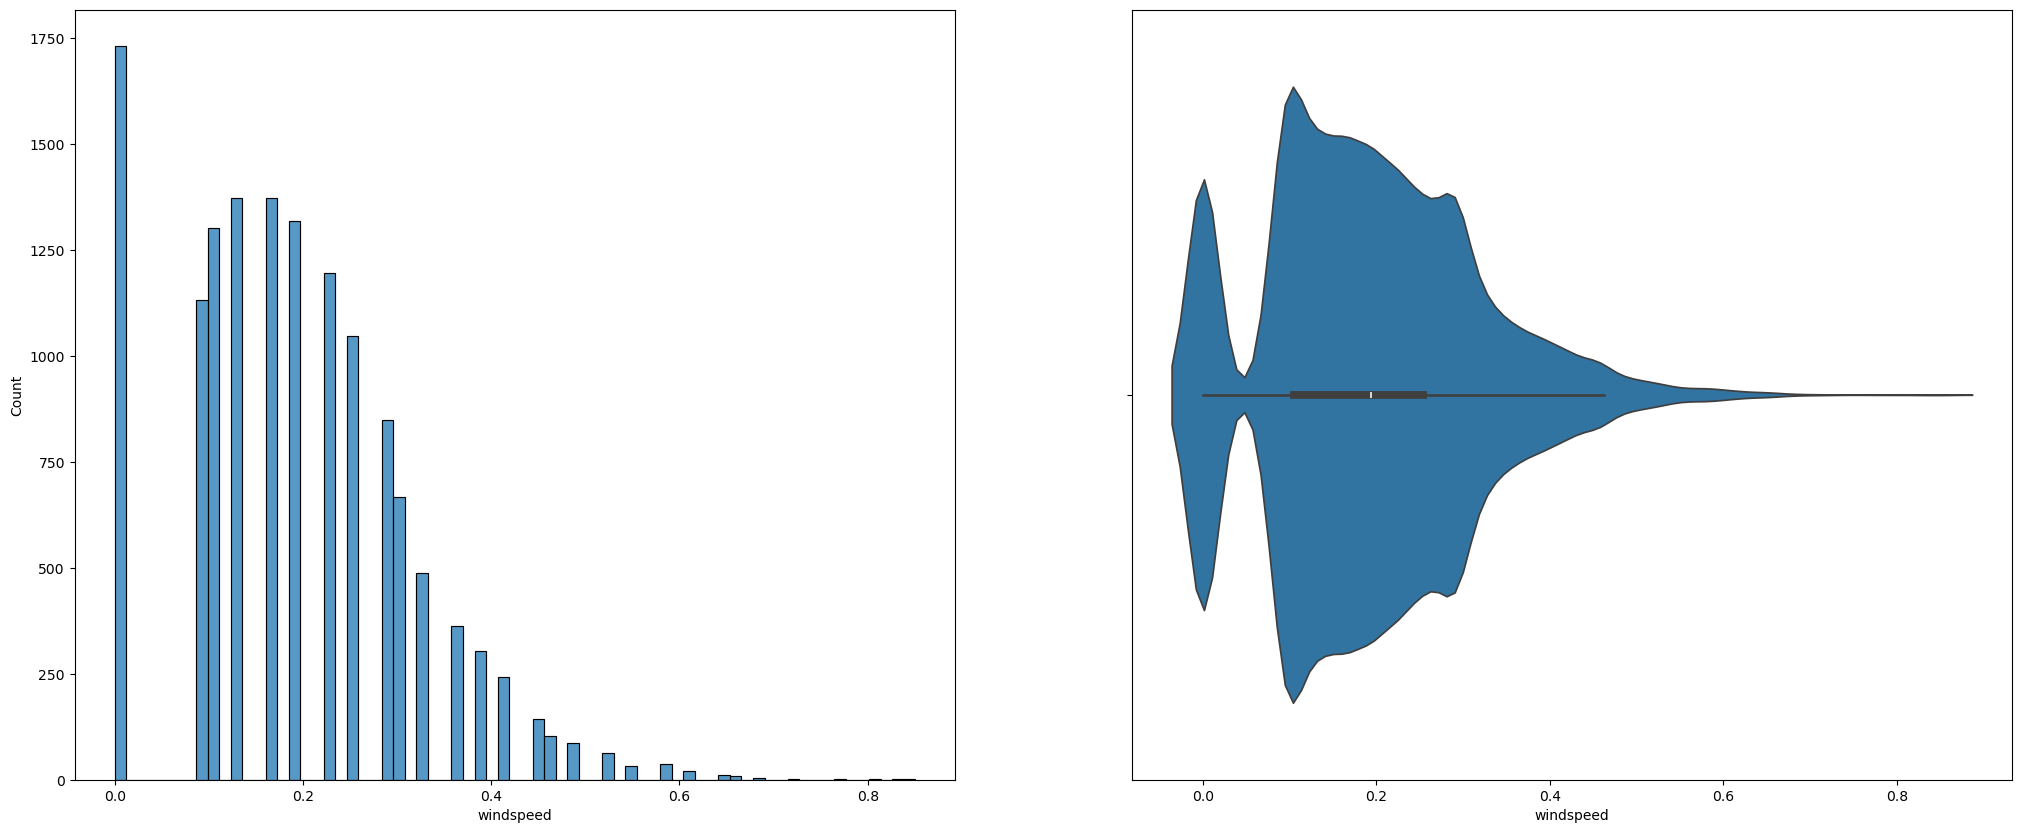

In [40]:
numVisualisation('windspeed')

There seems to be an overall exponential distribution, there aren't any outliers, so we can just proceed to visualising the relationship between the feature and the targets.

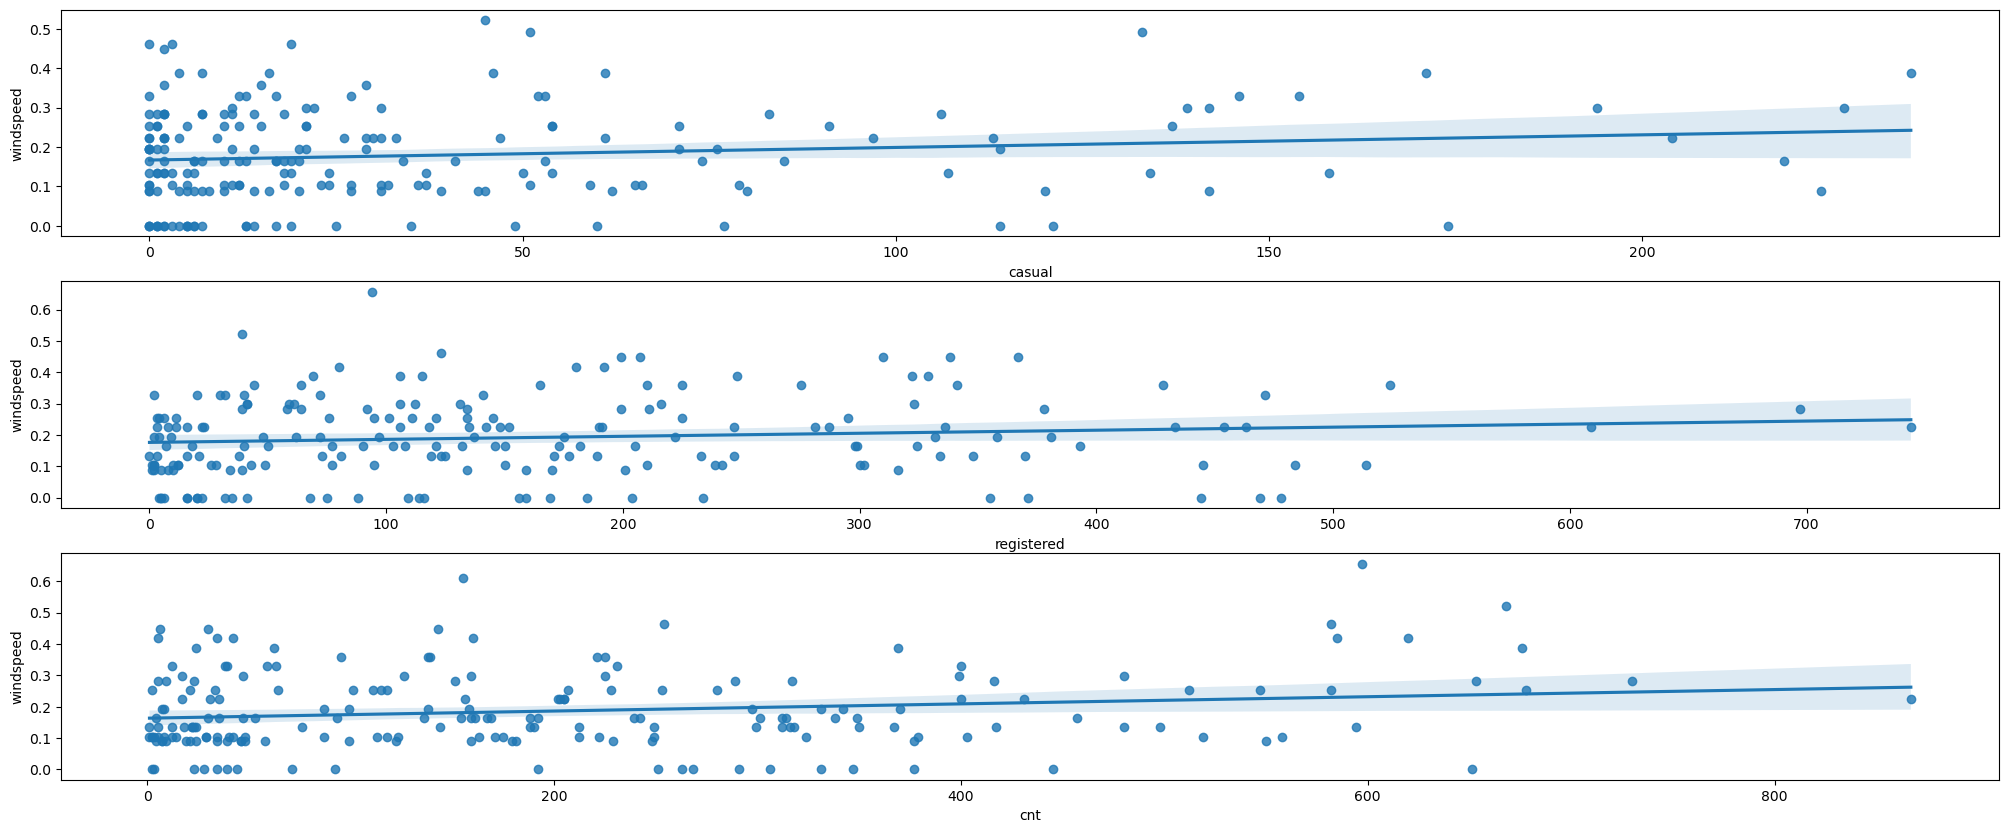

In [41]:
numVisualisationTgt('windspeed')

There does not seem to be any relationship between windspeed and the targets, we will further verify that later with the correlation matrices.

# Correlation matricies

# Pearson correlation

We will now generate the correlation matrices for our dataset, they can reveal some insights that we did not notice while visualising the data.

In [42]:
columns = train_data.columns
corr = train_data[columns].corr(numeric_only=True,method ="pearson")

casPearson = corr[['casual']] #saving the correlation indexes for our targets
regPearson = corr[['registered']]
cntPearson = corr[['cnt']]

corr

,instant,season,is_yr_one,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404912,0.865657,0.489999,-0.004340,0.012594,0.002076,0.000674,-0.015022,0.137724,0.006597,-0.073080,0.160178,0.285828,0.281980
season,0.404912,1.000000,-0.009930,0.829845,-0.009010,-0.012227,-0.004892,0.016603,-0.013482,0.308113,0.155285,-0.152565,0.116655,0.177893,0.180120
is_yr_one,0.865657,-0.009930,1.000000,-0.010228,-0.002440,0.003500,-0.002851,0.001971,-0.020505,0.043947,-0.088933,-0.007354,0.145989,0.256146,0.253363
mnth,0.489999,0.829845,-0.010228,1.000000,-0.006720,0.019471,0.008789,-0.003263,0.006026,0.199296,0.167213,-0.134730,0.067087,0.125197,0.122674
hr,-0.004340,-0.009010,-0.002440,-0.006720,1.000000,-0.000215,-0.006696,0.006111,-0.022276,0.133236,-0.276954,0.136833,0.297655,0.371119,0.390556
holiday,0.012594,-0.012227,0.003500,0.019471,-0.000215,1.000000,-0.099422,-0.250504,-0.019391,-0.028805,-0.007176,0.004868,0.030376,-0.046567,-0.030554
weekday,0.002076,-0.004892,-0.002851,0.008789,-0.006696,-0.099422,1.000000,0.031143,-0.003360,0.000886,-0.045297,0.017453,0.040041,0.022131,0.029364
workingday,0.000674,0.016603,0.001971,-0.003263,0.006111,-0.250504,0.031143,1.000000,0.045851,0.057102,0.012247,-0.011764,-0.300672,0.135279,0.030884
weathersit,-0.015022,-0.013482,-0.020505,0.006026,-0.022276,-0.019391,-0.003360,0.045851,1.000000,-0.104907,0.414441,0.033777,-0.154271,-0.123342,-0.144881
temp,0.137724,0.308113,0.043947,0.199296,0.133236,-0.028805,0.000886,0.057102,-0.104907,1.000000,-0.071605,-0.022553,0.458995,0.338169,0.407038


<Axes: >

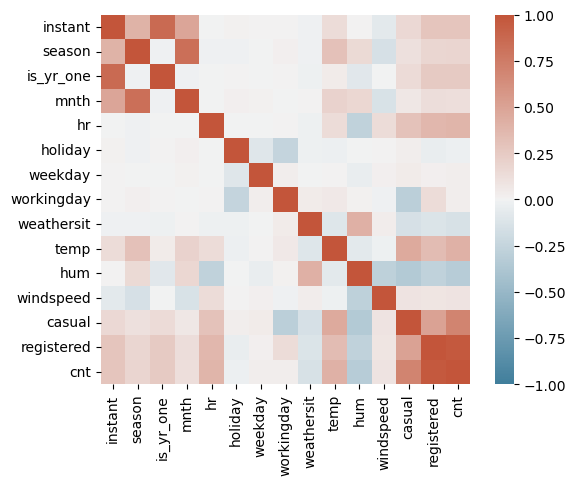

In [43]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin=-1, vmax=1, cmap=cmap)

As can be seen, temp and atemp, as expected are extremely correlated, month and season are also related, but to a not as high degree as temp and atemp, we wil discuss how we will deal with that later.

We will do another visualisation for the relationship for the targets, but first we need to get the absolute values for the correlation indexes, since that is what matters to us.

In [44]:
casPearson = casPearson.abs()
regPearson = regPearson.abs()
cntPearson = cntPearson.abs()

Next, we have to drop the Target values from the correlation indexes, since they are what we want to predict, so ideally they should not be included in our models

In [45]:
casPearson.drop(['casual','registered','cnt'],inplace=True)
regPearson.drop(['casual','registered','cnt'],inplace=True)
cntPearson.drop(['casual','registered','cnt'],inplace=True)

Finally, we need to sort our correlation indexes in descending order

In [46]:
casPearson.sort_values(ascending=False,inplace=True,by= 'casual')
regPearson.sort_values(ascending=False,inplace=True,by= 'registered')
cntPearson.sort_values(ascending=False,inplace=True,by= 'cnt')

We now have 3 small dataframes with our correlation indexes, we can now plot them to ease our visualisation of it.

<Axes: ylabel='cnt'>

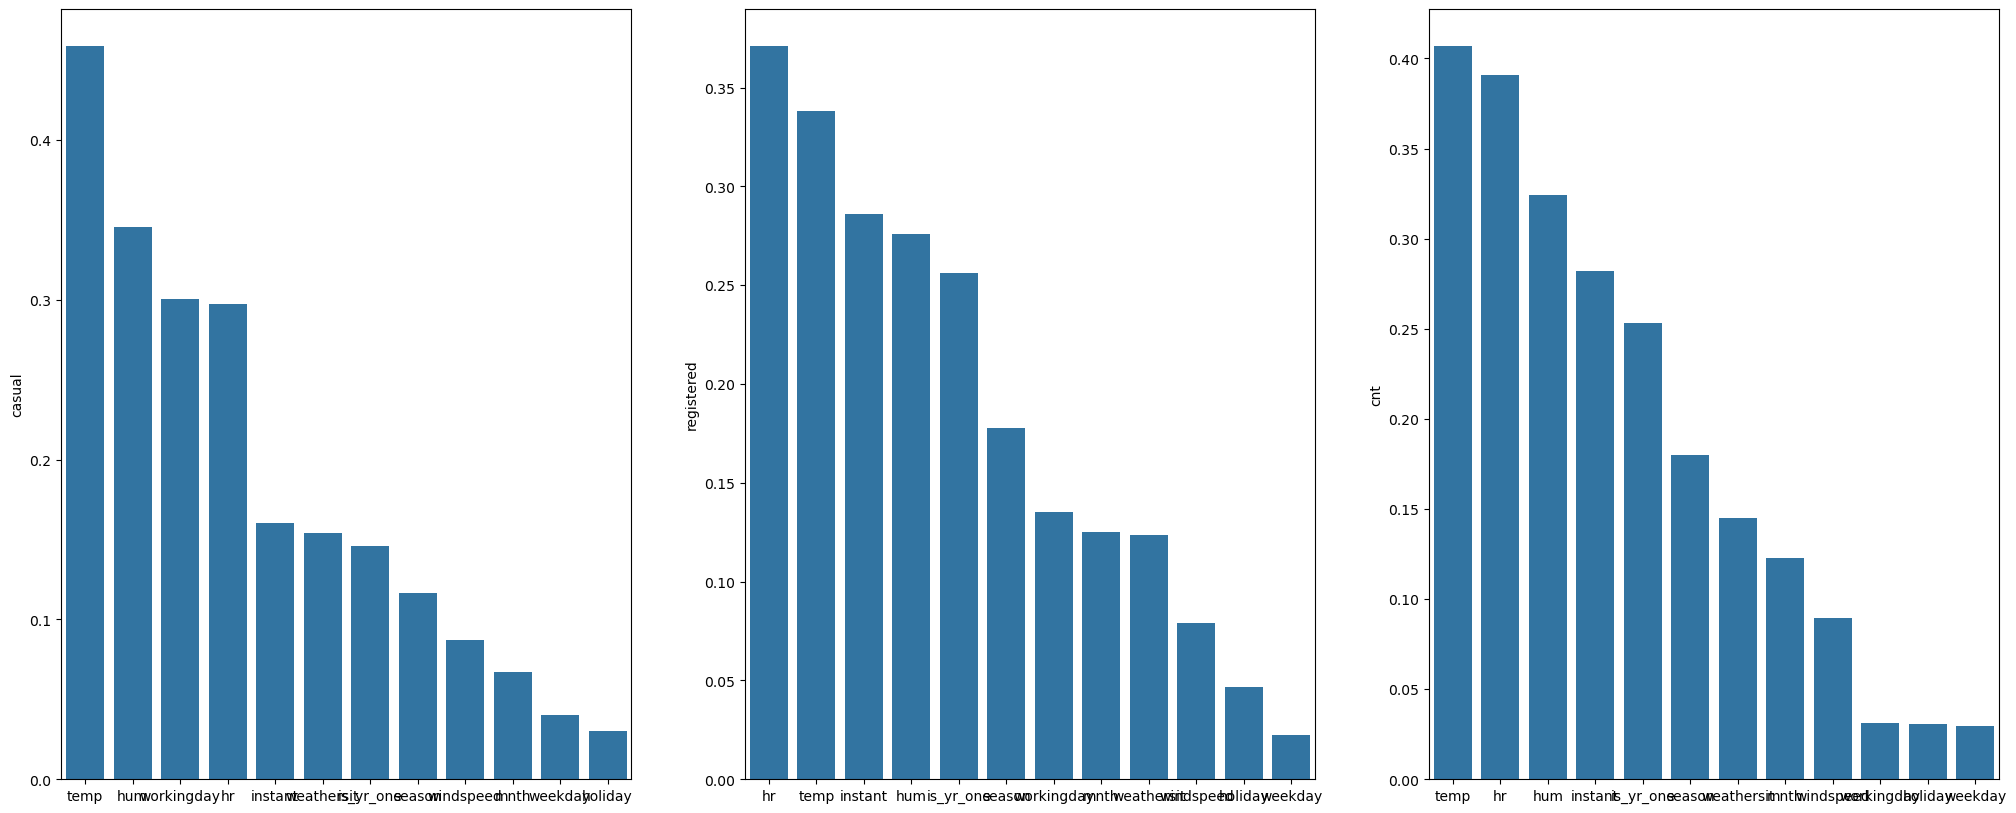

In [47]:
fig, axes = plt.subplots(1,3, figsize=(25, 10))
sns.barplot(casPearson.casual,ax=axes[0])
sns.barplot(regPearson.registered,ax=axes[1])
sns.barplot(cntPearson.cnt,ax=axes[2])

In [48]:
top10casP = casPearson.iloc[0:10].index
top10regP = regPearson.iloc[0:10].index
top10cntP = cntPearson.iloc[0:10].index

print(str(top10casP)+'\r'+str(top10regP)+'\r'+str(top10cntP)+'\r')

Index(['temp', 'hum', 'workingday', 'hr', 'instant', 'weathersit', 'is_yr_one',
       'season', 'windspeed', 'mnth'],
Index(['hr', 'temp', 'instant', 'hum', 'is_yr_one', 'season', 'workingday',
       'mnth', 'weathersit', 'windspeed'],
Index(['temp', 'hr', 'hum', 'instant', 'is_yr_one', 'season', 'weathersit',
       'mnth', 'windspeed', 'workingday'],
      dtype='object')


We now have the best predictors for each of our targets, we can use other correlation algorithms to see if they reveal something new.

# Spearman's rank coefficient

We will now use antoher coefficient algorithm to try and get new insights.

In [49]:
columns = train_data.columns
corr = train_data[columns].corr(numeric_only=True,method ="spearman")

casSpearman = corr[['casual']] #saving the correlation indexes for our targets
regSpearman = corr[['registered']]
cntSpearman = corr[['cnt']]

corr

,instant,season,is_yr_one,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404419,0.865986,0.489424,-0.004323,0.012619,0.002057,0.000636,-0.008327,0.129227,0.004363,-0.071828,0.163075,0.261468,0.248971
season,0.404419,1.000000,-0.009894,0.829690,-0.009021,-0.012134,-0.004869,0.016531,-0.011549,0.302081,0.152270,-0.140340,0.181900,0.186460,0.188451
is_yr_one,0.865986,-0.009894,1.000000,-0.010216,-0.002445,0.003500,-0.002871,0.001971,-0.015286,0.039768,-0.088143,-0.008740,0.119466,0.225288,0.211963
mnth,0.489424,0.829690,-0.010216,1.000000,-0.006711,0.019750,0.008659,-0.003469,0.010374,0.188329,0.162144,-0.130634,0.117580,0.130554,0.128807
hr,-0.004323,-0.009021,-0.002445,-0.006711,1.000000,-0.000208,-0.006687,0.006106,-0.032019,0.129053,-0.278408,0.139235,0.471916,0.505405,0.505916
holiday,0.012619,-0.012134,0.003500,0.019750,-0.000208,1.000000,-0.098951,-0.250504,-0.015734,-0.029362,-0.008892,0.004285,0.017719,-0.042287,-0.028312
weekday,0.002057,-0.004869,-0.002871,0.008659,-0.006687,-0.098951,1.000000,0.030158,-0.002455,-0.003173,-0.044479,0.017887,0.015576,0.036670,0.032740
workingday,0.000636,0.016531,0.001971,-0.003469,0.006106,-0.250504,0.030158,1.000000,0.044292,0.056289,0.013899,-0.010064,-0.177333,0.083334,0.021398
weathersit,-0.008327,-0.011549,-0.015286,0.010374,-0.032019,-0.015734,-0.002455,0.044292,1.000000,-0.105357,0.404639,0.017191,-0.162170,-0.114915,-0.129083
temp,0.129227,0.302081,0.039768,0.188329,0.129053,-0.029362,-0.003173,0.056289,-0.105357,1.000000,-0.056732,-0.009994,0.571678,0.374690,0.424696


<Axes: >

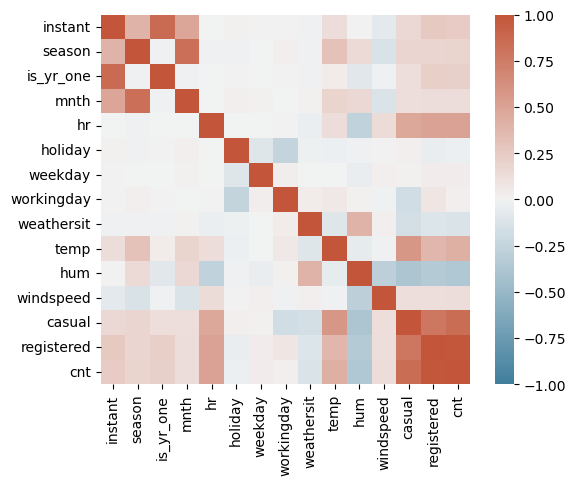

In [50]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin=-1, vmax=1, cmap=cmap)

Apparently there are no new insights, we will do the same visualisations and modifications to our correlation indexes for our targets.

In [51]:
casSpearman = casSpearman.abs()
regSpearman = regSpearman.abs()
cntSpearman = cntSpearman.abs()

casSpearman.drop(['casual','registered','cnt'],inplace=True)
regSpearman.drop(['casual','registered','cnt'],inplace=True)
cntSpearman.drop(['casual','registered','cnt'],inplace=True)

casSpearman.sort_values(ascending=False,inplace=True,by= 'casual')
regSpearman.sort_values(ascending=False,inplace=True,by= 'registered')
cntSpearman.sort_values(ascending=False,inplace=True,by= 'cnt')

<Axes: ylabel='cnt'>

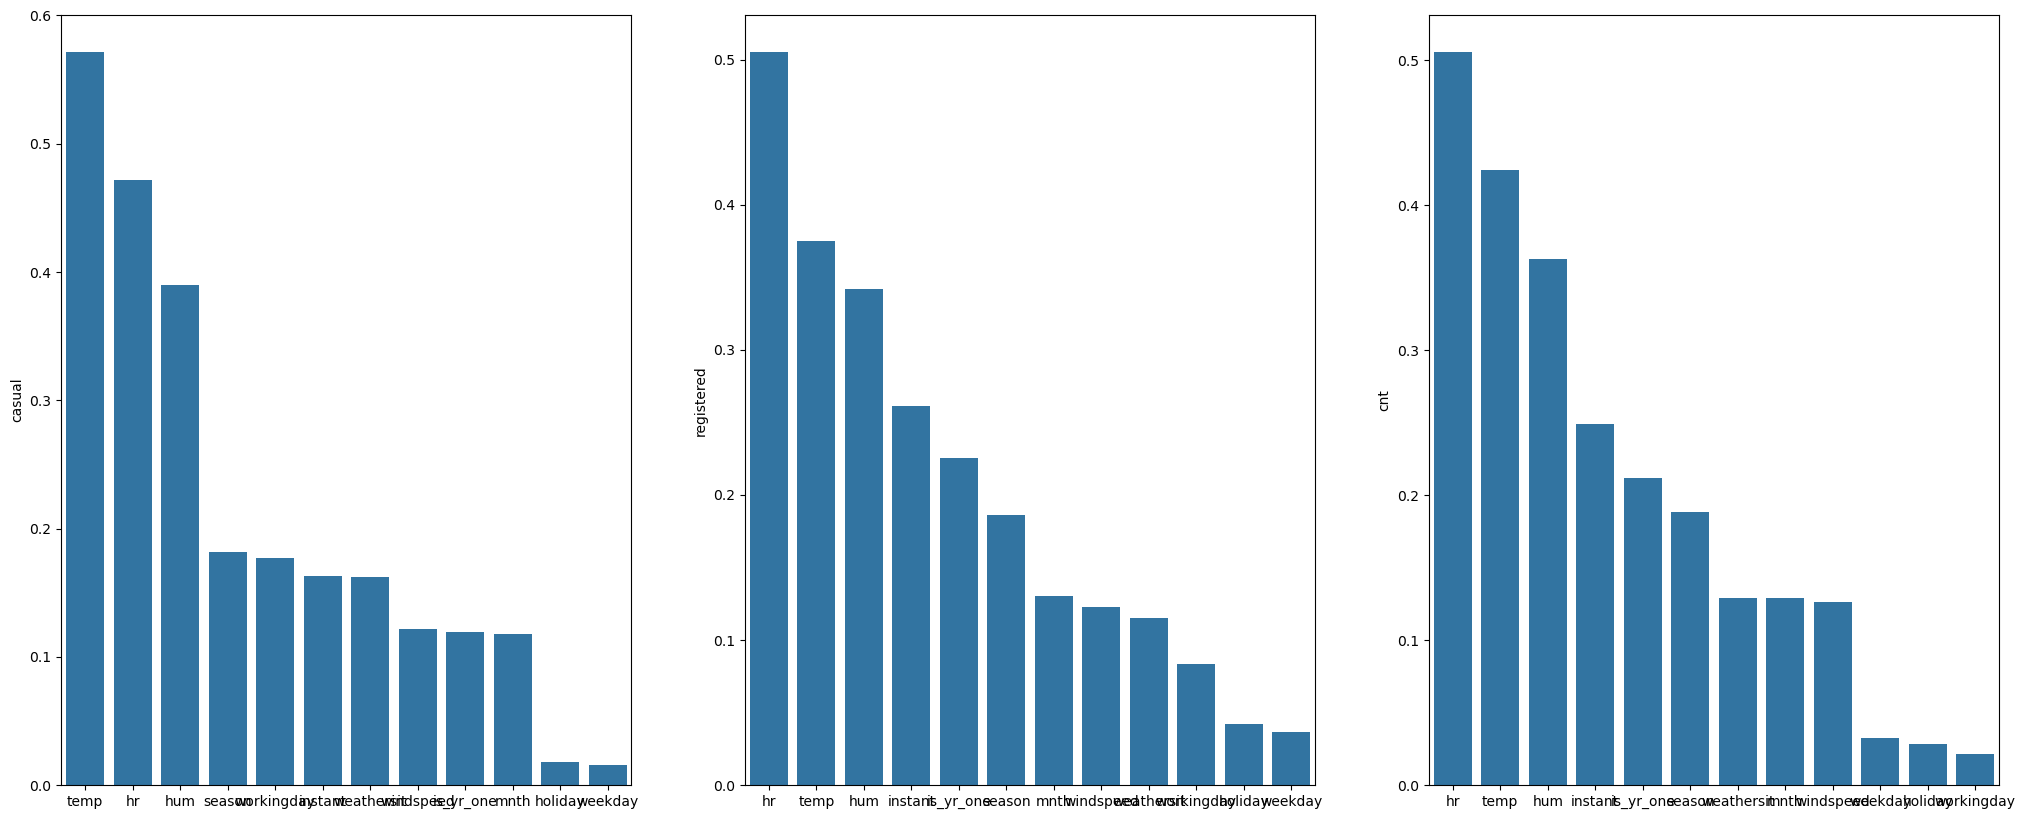

In [52]:
fig, axes = plt.subplots(1,3, figsize=(25, 10))
sns.barplot(casSpearman.casual,ax=axes[0])
sns.barplot(regSpearman.registered,ax=axes[1])
sns.barplot(cntSpearman.cnt,ax=axes[2])

In [53]:
top10casS = casSpearman.iloc[0:10].index
top10regS = regSpearman.iloc[0:10].index
top10cntS = cntSpearman.iloc[0:10].index

print(str(top10casS)+'\r'+str(top10regS)+'\r'+str(top10cntS)+'\r')

Index(['temp', 'hr', 'hum', 'season', 'workingday', 'instant', 'weathersit',
       'windspeed', 'is_yr_one', 'mnth'],
Index(['hr', 'temp', 'hum', 'instant', 'is_yr_one', 'season', 'mnth',
       'windspeed', 'weathersit', 'workingday'],
Index(['hr', 'temp', 'hum', 'instant', 'is_yr_one', 'season', 'weathersit',
       'mnth', 'windspeed', 'weekday'],
      dtype='object')


There doesn't seem to be any major changes, with most of the features appearing in both rankings, just in a slightly different order.

# Linear regression modeling 

Before we start our modeling, we need to drop the target variables from our dataset, and get an array of our features, this will be useful later.

In [54]:
features = train_data.columns.drop(['casual','registered','cnt','instant'])
features

Index(['season', 'is_yr_one', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed'],
      dtype='object')

# K-fold cross-validation

Next we will define a function to do our K-fold cross-validation for us

In [55]:
from sklearn.model_selection import cross_val_score

def K_fold_validation_scoring(model,X,y,scoring:str):
    scores = cross_val_score(model, X, y, cv=10,scoring=scoring)#does 10-fold cross validation and returns the NRMSE scores
    return scores.mean()#returns the mean NRMSE value

Now we have a function that evaluates our models using K-fold cross-validation, with a K of 10, next we need to implement a forward selection algorithm to help us determine what features will be selected for our model.

# Forward selection with cross validation

We will now implement a forward selection algorithm using cross-validation.

In [56]:
def fwd_selection_cross_validation(X,y,features,minScoreVariation : float,detailedOutput : bool,scoring : str,model):
    used_features=[]#list to store the features should be used on our model according to forward selection 
    unused_features = list(features)#list of all the features available to our model, in the end will contain the unused features
    current_score = float('-inf')#variable to store the score of our curent model
    best_current_score = float('-inf')#variable to store the best score recorded

    while current_score == best_current_score and unused_features:
        score_for_feature = []#list to store the score obtained with each feature
        for feature in unused_features:#iterates trough every unused feature and does 10-fold cross validation for each
            current_features = used_features + [feature]
            model.fit(X=X[current_features],y=y)
            score = K_fold_validation_scoring(model,X[current_features],y,scoring)
            score_for_feature.append((score,feature))
        
        score_for_feature.sort()#sorts the scores so the lowest value is on the beginning of the array
        best_current_score,best_feature = score_for_feature.pop(score_for_feature.__len__()-1)#gets the best feature along with its score

        if(detailedOutput):#if detailed output is set to True outputs more detailed information about the process
            print('Best current score: '+str(best_current_score)+'\nWith addition of feature: '+str(best_feature))

        if current_score < (best_current_score-minScoreVariation):#if the new score - the minimun varition set by the user
            unused_features.remove(best_feature)# is lower than the precious score, adds the feature to the selected features
            used_features.append(best_feature)# and replaces the current score with the new score
            current_score = best_current_score
        elif(detailedOutput):
                print('Rejected feature: '+best_feature+'\nReason : Low score increase (<'+str(minScoreVariation)+')\nFinal model has '+str(used_features.__len__())+' features')

    return used_features,current_score

            

We now have a basic function that does forward selection with cross-validation, we can test it out by calculating the best features for target 'casual'

In [57]:
from sklearn.linear_model import LinearRegression

selected_features_casual,RMSE_casual = fwd_selection_cross_validation(X=train_data[features],y=train_data['casual'],features=features,minScoreVariation=0.02,detailedOutput=True,scoring = 'neg_root_mean_squared_error',model= LinearRegression())
RMSE_casual = RMSE_casual * -1
print('Selected features: '+str(selected_features_casual)+'\nRMSE: '+str(RMSE_casual))

Best current score: -44.08663713184175
With addition of feature: temp
Best current score: -40.98788348660226
With addition of feature: workingday
Best current score: -38.03320493953572
With addition of feature: hum
Best current score: -37.18415642772821
With addition of feature: hr
Best current score: -36.82113369221491
With addition of feature: is_yr_one
Best current score: -36.769346705232394
With addition of feature: holiday
Best current score: -36.72856225330897
With addition of feature: weekday
Best current score: -36.69371125446379
With addition of feature: season
Best current score: -36.682239885348494
With addition of feature: weathersit
Rejected feature: weathersit
Reason : Low score increase (<0.02)
Final model has 8 features
Selected features: ['temp', 'workingday', 'hum', 'hr', 'is_yr_one', 'holiday', 'weekday', 'season']
RMSE: 36.69371125446379


As can be seen we now have the best features for using in our linear regression model, selected with forward selection and cross-validation, as well as an expected RMSE of 36,16 obtained with 10-fold cross-validation. Due to the usage of robust techniques they should be close to the best ones possible according to the parameters we set.

Using our forward selection algorithm, we can get the best features for our other targets as well.

In [58]:
selected_features_registered,RMSE_registered = fwd_selection_cross_validation(X=train_data[features],y=train_data['registered'],features=features,minScoreVariation=0.03,detailedOutput=True,scoring = 'neg_root_mean_squared_error',model= LinearRegression())
RMSE_registered = RMSE_registered * -1
print('Selected features: '+str(selected_features_registered)+'\nRMSE: '+str(RMSE_registered))

Best current score: -141.11938080702186
With addition of feature: hr
Best current score: -133.99028375781987
With addition of feature: temp
Best current score: -128.77283447065324
With addition of feature: is_yr_one
Best current score: -126.80138231336018
With addition of feature: hum
Best current score: -125.27755195793479
With addition of feature: season
Best current score: -123.94784096131612
With addition of feature: workingday
Best current score: -123.92193830374211
With addition of feature: weathersit
Rejected feature: weathersit
Reason : Low score increase (<0.03)
Final model has 6 features
Selected features: ['hr', 'temp', 'is_yr_one', 'hum', 'season', 'workingday']
RMSE: 123.94784096131612


Now we have the best predictors for the registered target, with an RMSE of 123,06, the RMSE of this feature is higher due to the larger values it has on average, so the errors 'pile-up' more, so its not the best idea to compare the RMSE of different targets, we will discuss what we can use to compare them later.

In [59]:
selected_features_total,RMSE_total = fwd_selection_cross_validation(X=train_data[features],y=train_data['cnt'],features=features,minScoreVariation=0.03,detailedOutput=True,scoring = 'neg_root_mean_squared_error',model= LinearRegression())
RMSE_total = RMSE_total * -1
print('Selected features: '+str(selected_features_total)+'\nRMSE: '+str(RMSE_total))

Best current score: -166.4935404072222
With addition of feature: temp
Best current score: -154.57546794779176
With addition of feature: hr
Best current score: -148.35416078550563
With addition of feature: is_yr_one
Best current score: -144.22191820046072
With addition of feature: hum
Best current score: -142.63898482869803
With addition of feature: season
Best current score: -142.58515440553225
With addition of feature: holiday
Best current score: -142.5440455619371
With addition of feature: weekday
Best current score: -142.52621367128862
With addition of feature: windspeed
Rejected feature: windspeed
Reason : Low score increase (<0.03)
Final model has 7 features
Selected features: ['temp', 'hr', 'is_yr_one', 'hum', 'season', 'holiday', 'weekday']
RMSE: 142.5440455619371


And finally we have the selected features along with an expected RMSE of 141,41 for our final target of total count.

# Fitting the model and generating final evaluation metrics

Using the features we got we can now create our model, fit it with the data and get the final metrics for it.

# Casual

We will start by fitting the model and getting the predicted values for our Casual target. 

In [60]:
modelCasual = LinearRegression()
modelCasual.fit(X=train_data[selected_features_casual],y=train_data['casual'])

casual_y_pred = modelCasual.predict(test_data[selected_features_casual])

print("Coefficients: \n", modelCasual.coef_)

Coefficients: 
 [108.40695521 -35.54752635 -66.41830693   1.24351487  10.55735643
 -11.69344675   0.89064104   1.57700542]


From the predicted values from our model we can get the residuals, which will allow us to get many important metrics.

In [61]:
predictionsCasual = pd.DataFrame()
predictionsCasual['testing_values'] = test_data['casual']
predictionsCasual['predicted_values'] = casual_y_pred
predictionsCasual['residuals'] = predictionsCasual.testing_values - predictionsCasual.predicted_values.abs()
predictionsCasual

,testing_values,predicted_values,residuals
13854,155,102.436896,52.563104
15312,0,18.988560,-18.988560
2448,2,36.738207,-34.738207
13236,103,76.444745,26.555255
10002,13,71.807693,-58.807693
...,...,...,...
4253,5,33.316397,-28.316397
12681,255,87.069733,167.930267
3117,69,50.001596,18.998404
11617,8,7.955091,0.044909


First, we can take a look at the mean for the residuals, it should ideally be close to 0, because that indicates to us that our model isn't prone to undershooting or overestimating our values.

In [62]:
predictionsCasual.residuals.mean()

-4.37250502038616

The mean of our residuals is fairly close to 0, which is a good sign.

Next we have to check the distribution of our residuals, it should ideally be a normal distribution.

C:\Users\lucas\anaconda3\envs\data_mining\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


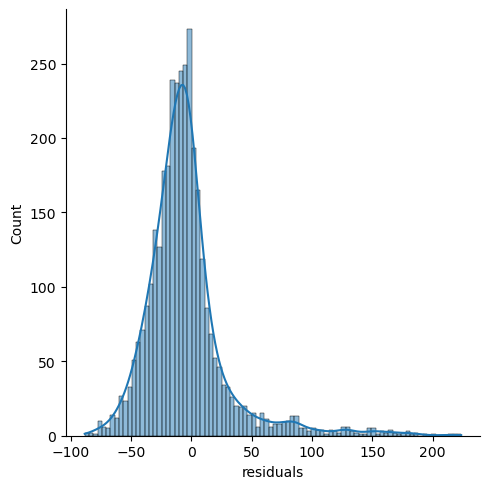

In [63]:
sns.displot(x = predictionsCasual.residuals, kde=True)

As can be seen, our residuals fall fairly close to a normal distribution, despite being slightly right skewed, we can check how close it is to a normal distribution with a qqplot.

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

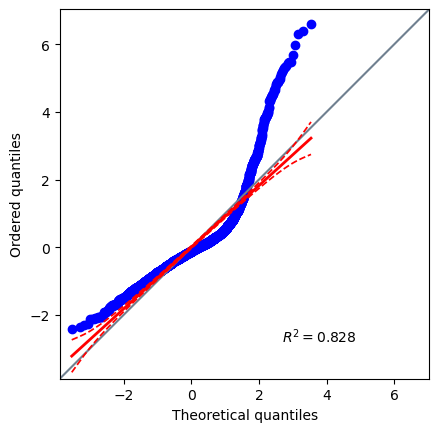

In [64]:
pg.qqplot(x=predictionsCasual.residuals)

We can confirm that our residuals fall fairly close to a normal distribution, this is good, since it indicates to us that most of the residuals fall fairly close to 0 (which is close to our mean) and the number of observations gets lower the further away we get from 0.

Next we need to calculate some metrics for our model, namely $R^2$ adjusted $R^2$ and RMSE, first we will define a function that calculates the RMSE for our model.

In [65]:
def RMSE_calc(testing_values,residuals):
    y = testing_values
    n = len(y)
    p = 2
    df = n-p
    MSE = sum(residuals**2) / df
    RMSE = np.sqrt(MSE)
    return RMSE

We can now calculate the RMSE for our model using our function.

In [66]:
RMSEC = RMSE_calc(predictionsCasual.testing_values,predictionsCasual.residuals)
print('RMSE = '+str(RMSEC))

RMSE = 34.87476158923186


The RMSE stands for root mean squared error; since it is a metric of error, we ideally want it to be as low as possible, the value we got is satisfactory given our dataset.

Next we need to define a function to calculate $R^2$ and adjusted $R^2$.

In [67]:
def r2_calc(testing_values,residuals,training_data):
    SS_Residual = sum((residuals)**2)       
    SS_Total = sum((testing_values-np.mean(testing_values))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(testing_values)-1)/(len(testing_values)-training_data.shape[1]-1)
    return r_squared, adjusted_r_squared

With that we can now calculate the $R^2$ and adjusted $R^2$ vallues for our model.

In [68]:
R2C,adjustedR2C = r2_calc(predictionsCasual.testing_values,predictionsCasual.residuals,train_data[selected_features_casual])
print('R2 = '+str(R2C))
print('Adjusted R2 = '+str(adjustedR2C))

R2 = 0.46811960831250843
Adjusted R2 = 0.4668923100334488


$R^2$ and adjusted $R^2$ vary from 0 to 1, with 1 indicating that our model explains all the variance in our dataset and 0 indicating it explains none of the variance, ideally we want it be as close to 1 as possible.

# Registered

Now we will fit the model and get the predicted values from the model for the registered users. 

In [69]:
modelRegistered = LinearRegression()
modelRegistered.fit(X=train_data[selected_features_registered],y=train_data['registered'])

registered_y_pred = modelRegistered.predict(test_data[selected_features_registered])

print("Coefficients: \n", modelRegistered.coef_)

Coefficients: 
 [   6.41547845  178.87489434   70.51939786 -142.81899331   19.09238205
   39.05356364]


In [70]:
predictionsRegistered = pd.DataFrame()
predictionsRegistered['testing_values'] = test_data['registered']
predictionsRegistered['predicted_values'] = registered_y_pred
predictionsRegistered['residuals'] = predictionsRegistered.testing_values - predictionsRegistered.predicted_values.abs()
predictionsRegistered

,testing_values,predicted_values,residuals
13854,282,235.968037,46.031963
15312,41,171.966655,-130.966655
2448,22,82.536205,-60.536205
13236,769,316.356805,452.643195
10002,130,194.667330,-64.667330
...,...,...,...
4253,6,125.265464,-119.265464
12681,327,208.209179,118.790821
3117,179,93.323897,85.676103
11617,127,119.495638,7.504362


Next we have to calculate the mean of our residuals, which should be close to 0.

In [71]:
predictionsRegistered.residuals.mean()

-3.9859632794362603

Great, the value is very close to 0, next we need to check the distribution of our residuals.

C:\Users\lucas\anaconda3\envs\data_mining\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


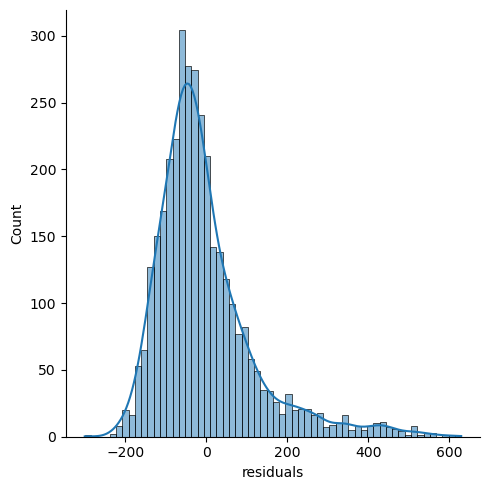

In [72]:
sns.displot(x = predictionsRegistered.residuals, kde=True)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

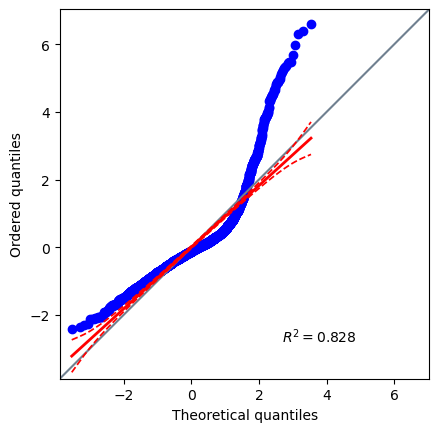

In [73]:
pg.qqplot(x=predictionsCasual.residuals)

Again good results, our distribution is close to an ideal normal distribution.

Next we will calculate the important metrics.

In [74]:
RMSER = RMSE_calc(predictionsRegistered.testing_values,predictionsRegistered.residuals)
print('RMSE = '+str(RMSER))

RMSE = 121.82130629212563


Again, we got a good RMSE value.

Now to calculating the value of $R^2$

In [75]:
R2R,adjustedR2R = r2_calc(predictionsRegistered.testing_values,predictionsRegistered.residuals,train_data[selected_features_registered])
print('R2 = '+str(R2R))
print('Adjusted R2 = '+str(adjustedR2R))

R2 = 0.3288306593571061
Adjusted R2 = 0.32766980146034697


We got decent values for $R^2$ and adjusted $R^2$ so we can now examine our model for the last feature.

# Total

First, again to fit the model and get the predicted values.

In [76]:
modelTotal = LinearRegression()
modelTotal.fit(X=train_data[selected_features_total],y=train_data['cnt'])

total_y_pred = modelTotal.predict(test_data[selected_features_total])

print("Coefficients: \n", modelTotal.coef_)

Coefficients: 
 [ 287.52241097    7.6658966    81.12273283 -208.64434683   20.65426502
  -22.37399965    1.83289286]


In [77]:
predictionsTotal = pd.DataFrame()
predictionsTotal['testing_values'] = test_data['cnt']
predictionsTotal['predicted_values'] = total_y_pred
predictionsTotal['residuals'] = predictionsTotal.testing_values - predictionsTotal.predicted_values.abs()
predictionsTotal

,testing_values,predicted_values,residuals
13854,437,338.308551,98.691449
15312,41,192.059865,-151.059865
2448,24,125.041296,-101.041296
13236,872,391.073924,480.926076
10002,143,266.218193,-123.218193
...,...,...,...
4253,11,159.528406,-148.528406
12681,582,295.157272,286.842728
3117,248,149.064956,98.935044
11617,135,128.698141,6.301859


Next we have to calculate the mean of the residuals, remembering that it should be ideally close to 0.

In [78]:
predictionsTotal.residuals.mean()

-4.988032862564027

Again we got a good value for it, next we need to check the distribution of our residuals.

C:\Users\lucas\anaconda3\envs\data_mining\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


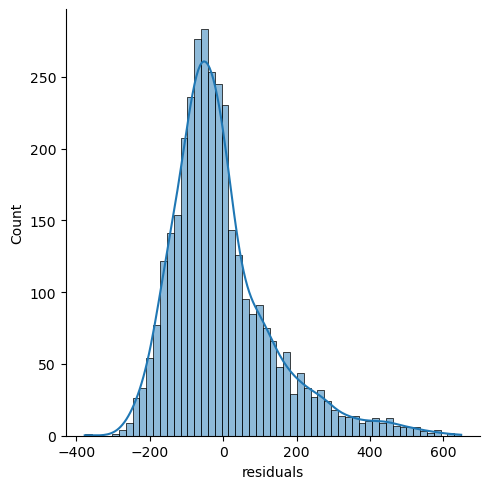

In [79]:
sns.displot(x = predictionsTotal.residuals, kde=True)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

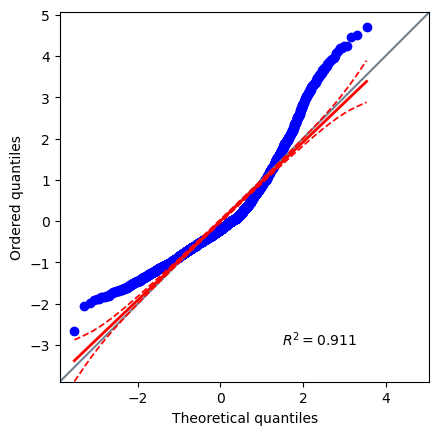

In [80]:
pg.qqplot(x=predictionsTotal.residuals)

The residuals for Total were the closest to a normal distribution, that is a sign that we got a good model.

Next we need to look at the metrics for this model, starting with RMSE, which is expected to be higher for this target, since it has the highest values on average.

In [81]:
RMSET = RMSE_calc(predictionsTotal.testing_values,predictionsTotal.residuals)
print('RMSE = '+str(RMSET))

RMSE = 139.3064504363613


Again, we got a good value for our RMSE considering this is the feature with the highest mean values.

Next we have to calculate the $R^2$ and the adjusted $R^2$.

In [82]:
R2T,adjustedR2T = r2_calc(predictionsTotal.testing_values,predictionsTotal.residuals,train_data[selected_features_total])
print('R2 = '+str(R2T))
print('Adjusted R2 = '+str(adjustedR2T))

R2 = 0.38521096013036005
Adjusted R2 = 0.38397003646280314


Again we got good values for $R^2$ and adjusted $R^2$, considering the dataset.

# Which target was the easiest to predict?

We can use both of our metrics to predict which of our targets was the best one to predict accurately using regression, for $R^2$ it is pretty easy, we can just compare them directly, since they are in the same scale, with casual having the best $R^2$ of around 0,46.

Comparing RMSE is a bit more complicated due to the way it is calculated, RMSE increases for targets with higher average values, since a small deviation will cause a larger difference in RMSE even if it is technically a smaller deviation compared to the original data, to fix this, I will scale the RMSE for our targets to the values on the dataset using min-max normalization, that way they will be more comparable between themselves.

First, we need to implement a function to calculate the normalized RMSE for us.

In [83]:
def normalisedRMSE(RMSE,minVal,maxVal):
    return (RMSE-minVal)/(maxVal-minVal)

Now that we have our RMSE normalizer, we can normalize our values and compare them on the same scale.

In [84]:
print('Normalised RMSE for Casual: '+str(normalisedRMSE(RMSEC,bike_hourly.casual.min(),bike_hourly.casual.max())))
print('Normalised RMSE for Registered: '+str(normalisedRMSE(RMSER,bike_hourly.registered.min(),bike_hourly.registered.max())))
print('Normalised RMSE for Total: '+str(normalisedRMSE(RMSET,bike_hourly.cnt.min(),bike_hourly.cnt.max())))

Normalised RMSE for Casual: 0.09502659833578163
Normalised RMSE for Registered: 0.13749583102948718
Normalised RMSE for Total: 0.14170742872578002


We got the lowest normalized RMSE value for Casual, which also had the lowest $R^2$, that pretty strongly indicates to us that casual is our best feature for regression, so we will apply our classification models on it.

In [85]:
best_target = 'casual'

# Classification

Before we start modeling and measuring our classification models, we first need to turn one of our numerical targets into a categorical target, we will be using the target we decided earlier was the one that got the best result with regression. 

To turn it into a categorical target we will be dividing it into four different categories divided by each 25th percentile, so the first category will be x>0 to x <= 25th percentile and so on.

First, we need to calculate our percentiles.

In [86]:
percentiles = []
percentiles.append(bike_hourly[best_target].quantile(q=0.25))
percentiles.append(bike_hourly[best_target].quantile(q=0.50))
percentiles.append(bike_hourly[best_target].quantile(q=0.75))
percentiles

[4.0, 17.0, 48.0]

Now that we have the values for our percentiles we can creeate a new categorical target based on those percentiles.

In [87]:
cat_target = []
for value in train_data[best_target]:
    if value <= percentiles[0]:
        cat_target.append("Low demand")
    elif value <= percentiles[1]:
        cat_target.append('Medium-Low demand')
    elif value <= percentiles[2]:
        cat_target.append('Medium-High demand')
    else:
        cat_target.append('High demand')

train_data['Categorical_target'] = cat_target

train_data['Categorical_target'] = train_data['Categorical_target'].astype('category')
train_data

,instant,season,is_yr_one,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,Categorical_target
11030,11031,2,True,4,18,False,1,True,1,0.54,0.34,0.2985,60,586,646,High demand
2175,2176,2,False,4,12,False,2,True,2,0.34,0.71,0.3881,6,32,38,Medium-Low demand
7240,7241,4,False,11,7,False,4,True,2,0.32,0.81,0.0896,12,280,292,Medium-Low demand
8655,8656,1,True,1,10,False,0,False,1,0.30,0.81,0.1045,18,52,70,Medium-High demand
16545,16546,4,True,11,3,False,2,True,3,0.32,0.70,0.1343,1,3,4,Low demand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9016,9017,1,True,1,13,True,1,False,2,0.24,0.41,0.4179,26,202,228,Medium-High demand
14433,14434,3,True,8,14,False,3,True,1,0.76,0.40,0.0896,87,214,301,High demand
999,1000,1,False,2,7,False,1,True,1,0.34,0.46,0.2985,2,96,98,Low demand
11705,11706,2,True,5,22,False,1,True,2,0.54,0.45,0.2537,26,147,173,Medium-High demand


In [88]:
cat_target = []
for value in test_data[best_target]:
    if value <= percentiles[0]:
        cat_target.append("Low demand")
    elif value <= percentiles[1]:
        cat_target.append('Medium-Low demand')
    elif value <= percentiles[2]:
        cat_target.append('Medium-High demand')
    else:
        cat_target.append('High demand')

test_data['Categorical_target'] = cat_target

test_data['Categorical_target'] = test_data['Categorical_target'].astype('category')
test_data

,instant,season,is_yr_one,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,Categorical_target
13854,13855,3,True,8,11,False,0,False,1,0.82,0.56,0.4179,155,282,437,High demand
15312,15313,4,True,10,5,False,5,True,1,0.52,0.77,0.0000,0,41,41,Low demand
2448,2449,2,False,4,22,False,6,False,3,0.42,1.00,0.0000,2,22,24,Low demand
13236,13237,3,True,7,17,False,2,True,1,0.78,0.49,0.1940,103,769,872,High demand
10002,10003,1,True,2,19,False,0,False,1,0.34,0.34,0.1642,13,130,143,Medium-Low demand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4253,4254,3,False,7,3,False,5,True,1,0.64,0.53,0.0000,5,6,11,Medium-Low demand
12681,12682,2,True,6,14,False,0,False,1,0.64,0.53,0.0000,255,327,582,High demand
3117,3118,2,False,5,19,False,6,False,3,0.54,0.94,0.1343,69,179,248,High demand
11617,11618,2,True,5,6,False,5,True,1,0.54,0.94,0.1045,8,127,135,Medium-Low demand


We now have our categorical target, we can quickly do a visualisation just to see how its distributed, since it was derived from the percentiles we should see a roughly equal number of observations for every category.

<Axes: xlabel='Categorical_target', ylabel='count'>

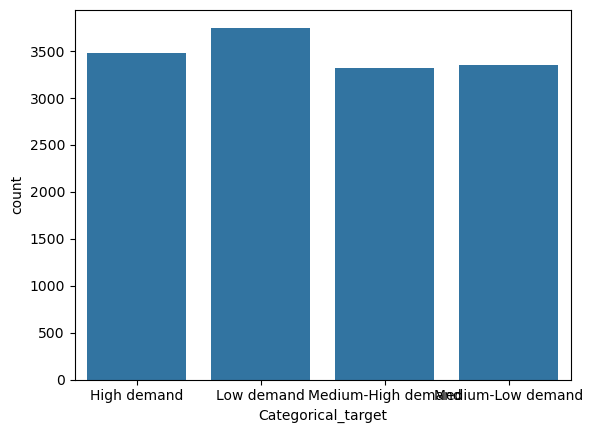

In [89]:
sns.countplot(train_data,x='Categorical_target')

As can be seen, we have a roughly equal representation of every category, there are a few more observations on Low demand, but not enough that it would be a problem.

# Forward selection with K-fold cross-validation

We already have our K-fold cross-validation function set up, we just need to give it our model along with the new train test split data and it should be able to work out the best targets for us 

In [90]:
features = train_data.columns.drop(['casual','registered','cnt','Categorical_target','instant'])
features

Index(['season', 'is_yr_one', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed'],
      dtype='object')

We will start with a Logistic Regression model as our first categorical model, we will be testing $l1$ (Lasso regression) and $l2$ (Ridge regression)(testing was done, $l1$ took over 30 minutes to complete forward selection,and got the same accuracy as Ridge regression, thus its not included in the notebook as to not impact total runtime), and picking the one that gives us the best results with forward selection.

In [91]:
from sklearn.linear_model import LogisticRegression

catModel1 = LogisticRegression(penalty='l2', max_iter=7600,solver='lbfgs')

In [92]:
selected_features_log_reg,acc_log_reg = fwd_selection_cross_validation(X=train_data[features],y=train_data['Categorical_target'],features=features,minScoreVariation=0.1,detailedOutput=True,scoring = 'accuracy',model= catModel1)
print('Selected features: '+str(selected_features_log_reg)+'\nAccuracy: '+str(acc_log_reg))

Best current score: 0.4178260037548682
With addition of feature: temp
Best current score: 0.5000398243590605
With addition of feature: hr
Rejected feature: hr
Reason : Low score increase (<0.1)
Final model has 1 features
Selected features: ['temp']
Accuracy: 0.4178260037548682


Now that we have the predicted accuracy and selected features for logistical regression, we can do forward selection for another classification algorithm, we will be using random forest, it is a way more complex algorithm that usually gives better results at the cost of higher computational demand.

In [93]:
from sklearn.ensemble import RandomForestClassifier

catModel2 = RandomForestClassifier(n_estimators = 100)

In [94]:
from time import time

start = time()
selected_features_rnd_frst,acc_rnd_frst = fwd_selection_cross_validation(X=train_data[features],y=train_data['Categorical_target'],features=features,minScoreVariation=0.1,detailedOutput=True,scoring = 'accuracy',model= catModel2)
timeNormal = time()-start
print('Selected features: '+str(selected_features_rnd_frst)+'\nAccuracy: '+str(acc_rnd_frst)+'\nIn '+str(timeNormal)+' Seconds')

Best current score: 0.5413928698881297
With addition of feature: hr
Best current score: 0.6492844545355807
With addition of feature: mnth
Best current score: 0.6766166362380979
With addition of feature: workingday
Rejected feature: workingday
Reason : Low score increase (<0.1)
Final model has 2 features
Selected features: ['hr', 'mnth']
Accuracy: 0.6492844545355807
In 115.77519059181213 Seconds


As expected, we got a considerably better accuracy, but we also needed more features and more precessing time, it also selected different features, that is due to the way those algorithms work, logistic regression uses a more mathematical, logical approach, random forest, uses a more abstract approach generating a number n of decision trees, and those trees are fed the input data and each one does their own processing and gets what they think is the correct answer, then they 'vote' on their answer and whichever one 'wins' the election is the predicted feature, due to them functioning in very different ways, they get different information from each feature, resulting in different features being picked for each model.

Now we have the selected features and predicted accuracy for both of our models, we can now compute the accuracy with the test data and other important metrics.

# Fitting and testing the models

The main metric we will use for our classification model will be the accuracy, it is simply a metric of how many of the guesses our model made were correct, in general we want that to be as high as possible.

We will also use the confusion matrix, it is a matrix with the correct anshwers on one axis and the model answers on another axis, the correct guesses are always on the main diagonal, this could be useful because it not only shows the accuracy of our model but could reveal something interesting, maybe our model is really bad at categorizing one category, but really good at another.

# Logistic Regression

First we will fit our model with the features we got from our forward selection, and predict the results from the test data.

In [95]:
catModel1.fit(train_data[selected_features_log_reg],y=train_data['Categorical_target'])

predCat1 = catModel1.predict(test_data[selected_features_log_reg])

Now that we have our predictions, we can get our metrics.

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix
testAccLogReg = accuracy_score(test_data['Categorical_target'], predCat1)
print('Accuracy: '+str(testAccLogReg))
confusionMat = confusion_matrix(test_data['Categorical_target'], predCat1)
print('Confusion matrix:\n')
print(confusionMat)

Accuracy: 0.42750287686996546
Confusion matrix:

[[610 108 122  13]
 [166 684 101  18]
 [380 262 177  19]
 [173 524 104  15]]


We got an accuracy of around 54%, which for this dataset means that our model was more than 2 times more effective than random guessing, since we have four categories, a model that just guessed randomly would get on average an accuracy of around 1/4 or 25%, so our accuracy isn't so bad.

From the confusion matrix we can gather that our model is not so good at predicting the 'medium-high demand' and 'high demand' categories, even though it was pretty good at the 'low demand' and 'medium-low demand' categories, it's hard to say specifically why that happened, but its probably beacause our selected features were somehow better at predicting lower values for demand, maybe another set of features would get an overall lower accuracy but would be better at predicting higher demand levels.

# Random forest

First, we will fit our model with the selected values, and make our predictions for the test data.

In [97]:
catModel2.fit(train_data[selected_features_rnd_frst],y=train_data['Categorical_target'])

predCat2 = catModel2.predict(test_data[selected_features_rnd_frst])

With our predictions we can calculate the metrics for our model.

In [98]:
testAccRndFrst = accuracy_score(test_data['Categorical_target'], predCat2)
print('Accuracy: '+str(testAccRndFrst))
confusionMat = confusion_matrix(test_data['Categorical_target'], predCat2)
print('Confusion matrix:\n')
print(confusionMat)

Accuracy: 0.6553509781357882
Confusion matrix:

[[689   0 135  29]
 [ 16 743  23 187]
 [270  14 382 172]
 [ 55 192 105 464]]


We got a much better accuracy of around 76%. Our model was also much more consistent with its errors, with them being more spread out through all categories, meaning that our model is not necessarily way better for one category than others, even if it is still better at predicting lower demands, it is not at such a high level as the logistic regression model.

# Comparing classification and regression

It is not wise to compare classification and regression directly, they work in very different ways, and do different things as well. Classification applies only to predicting categorical values, while regression mainly applies to numerical values, so comparing them directly makes little sense, in our use case, in this notebook, classification would be useful to get a rough estimate of how high your demand is, without getting any actual figures, being particularly good in a business sense to time maintenance breaks or any kind of service interrupts to times when demand is predicted to be low, whereas regression gives you a more exact figure, so if you, for any reason, need to know a more exact figure for demand, for example to predict revenue for a future period, regression would be more useful.

In summary, classification and regression are very different, and you need to deeply analyze your problem before deciding which ML procedure you want to use.

# Comparing classification and regression on classification

Note: I got slightly confused on what the 7th part of the assignment was, I interpreted it as either meaning evaluate the regression model as a classification model or discuss the differences between them, so I'm doing both. 

To evaluate our regression model as an evaluation model, we first need to derive the categories from it, for that we can use the PredictionsCasual dataframe that we have from earlier and get the categories from that just like we did on the dataset, using the same percentiles.

In [99]:
cat_target = []
for value in predictionsCasual['predicted_values']:
    if value <= percentiles[0]:
        cat_target.append("Low demand")
    elif value <= percentiles[1]:
        cat_target.append('Medium-Low demand')
    elif value <= percentiles[2]:
        cat_target.append('Medium-High demand')
    else:
        cat_target.append('High demand')

predictionsCasual['Categorical_prediction'] = cat_target

predictionsCasual['Categorical_prediction'] = predictionsCasual['Categorical_prediction'].astype('category')
predictionsCasual

,testing_values,predicted_values,residuals,Categorical_prediction
13854,155,102.436896,52.563104,High demand
15312,0,18.988560,-18.988560,Medium-High demand
2448,2,36.738207,-34.738207,Medium-High demand
13236,103,76.444745,26.555255,High demand
10002,13,71.807693,-58.807693,High demand
...,...,...,...,...
4253,5,33.316397,-28.316397,Medium-High demand
12681,255,87.069733,167.930267,High demand
3117,69,50.001596,18.998404,High demand
11617,8,7.955091,0.044909,Medium-Low demand


We can calculate the accuracy of our regression model on classification the same way that we did for our classification models earlier.

In [100]:
print('Accuracy: '+str(accuracy_score(test_data['Categorical_target'], predictionsCasual['Categorical_prediction'])))
print('Logisctic regression accuracy: '+str(testAccLogReg))
print('Random forest accuracy: '+str(testAccRndFrst))

Accuracy: 0.5028768699654775
Logisctic regression accuracy: 0.42750287686996546
Random forest accuracy: 0.6553509781357882


As can be seen, the accuracy of our regression model was worse than both of our classification models, that is mainly because our regression model predicts an exact value that is close to the original value, if our original value is close to one of the percentiles, when our model predicts a value, even a value close to the original might be on the other side of that boundry. I explained earlier in more detail why it probably isn't a good idea to compare classification and regression directly.

In [101]:
train_data.to_csv("Train_Data.csv")

In [102]:
from sklearn.ensemble import RandomForestClassifier

catModel2 = RandomForestClassifier(n_estimators = 100)

In [103]:
#selected_features_rnd_frst,acc_rnd_frst = fwd_selection_cross_validation(X=train_data[features],y=train_data['Categorical_target'],features=features,minScoreVariation=0.001,detailedOutput=True,scoring = 'accuracy',model= catModel2)
#print('Selected features: '+str(selected_features_rnd_frst)+'\nAccuracy: '+str(acc_rnd_frst))

In [110]:
import queue

def K_fold_validation_scoring_threaded(X,y,scoring:str,feature:str,q):
    model = RandomForestClassifier(n_estimators = 100,random_state=42)
    model.fit(X=X,y=y)
    scores = cross_val_score(model, X, y, cv=10,scoring=scoring)#does 10-fold cross validation and returns the scores
    print((scores.mean(),feature))
    q.put((scores.mean(),feature))

In [105]:
import threading
from multiprocessing.pool import ThreadPool
import time

def fwd_selection_cross_validation_threaded(X,y,features,minScoreVariation : float,detailedOutput : bool,scoring : str,model,nThreads:int):
    used_features=[]#list to store the features should be used on our model according to forward selection 
    unused_features = list(features)#list of all the features available to our model, in the end will contain the unused features
    current_score = float('-inf')#variable to store the score of our curent model
    best_current_score = float('-inf')#variable to store the best score recorded
    q = queue.Queue()
    subprocess = []
    CurrentY = y.values.tolist()
    
    while current_score == best_current_score and unused_features:
        pool = ThreadPool(processes=nThreads)
        score_for_feature = []#list to store the score obtained with each feature
        i=0
        for feature in unused_features:#iterates trough every unused feature and does 10-fold cross validation for each
            current_features = used_features + [feature]
            CurrentX = X[current_features].values.tolist()
            response = pool.apply_async(K_fold_validation_scoring_threaded,args = [CurrentX,CurrentY,scoring,feature,q])
            subprocess.append(response)
            i += 1

        pool.close()
        pool.join()
        
        for response in subprocess:
            try:
                response.get()
            except:
                print("Timeout error...")
        
        while not q.empty():
            score_for_feature.append(q.get())
            
        score_for_feature.sort()#sorts the scores so the lowest value is on the beginning of the array
        best_current_score,best_feature = score_for_feature.pop(score_for_feature.__len__()-1)#gets the best feature along with its score

        if(detailedOutput):#if detailed output is set to True outputs more detailed information about the process
            print('Best current score: '+str(best_current_score)+'\nWith addition of feature: '+str(best_feature))

        if current_score < (best_current_score-minScoreVariation):#if the new score - the minimun varition set by the user
            unused_features.remove(best_feature)# is lower than the precious score, adds the feature to the selected features
            used_features.append(best_feature)# and replaces the current score with the new score
            current_score = best_current_score
        elif(detailedOutput):
                print('Rejected feature: '+best_feature+'\nReason : Low score increase (<'+str(minScoreVariation)+')\nFinal model has '+str(used_features.__len__())+' features')

    return used_features,current_score

In [106]:
from time import time

features = train_data.columns.drop(['casual','registered','cnt','Categorical_target','instant'])

start = time() # Tempo inicial
selected_features_rnd_frst_threaded,acc_rnd_frst_threaded = fwd_selection_cross_validation_threaded(X=train_data[features],y=train_data['Categorical_target'],features=features,minScoreVariation=0.1,detailedOutput=True,scoring = 'accuracy',model= catModel2,nThreads = 50)
threadedTime = time()-start # Tempo total
print('Selected features: '+str(selected_features_rnd_frst_threaded)+'\nAccuracy: '+str(acc_rnd_frst_threaded)+'\nIn '+str(threadedTime)+' Seconds')

(0.2710926355967706, 'holiday')
(0.3053306197601229, 'is_yr_one')
(0.3192110639310263, 'workingday')
(0.29957527579661647, 'weathersit')
(0.37171973995210733, 'season')
(0.31784441605594027, 'weekday')
(0.37459697231431244, 'mnth')
(0.3009435269900543, 'windspeed')
(0.5411771977098407, 'hr')
(0.4352326621808233, 'temp')
(0.39372874956684545, 'hum')
Best current score: 0.5411771977098407
With addition of feature: hr
(0.5490901944152802, 'is_yr_one')
(0.5406019684611765, 'holiday')
(0.5546992226491991, 'workingday')
(0.5557778938603251, 'weathersit')
(0.6158379924385436, 'season')
(0.5593021944773441, 'weekday')
(0.6492849717350491, 'mnth')
(0.5363587605831941, 'windspeed')
(0.6318058536635824, 'temp')
(0.5369339898318584, 'hum')
Best current score: 0.6492849717350491
With addition of feature: mnth
(0.6424512151601509, 'season')
(0.6480622604719961, 'holiday')
(0.6773358538187422, 'workingday')
(0.6470540835484021, 'is_yr_one')
(0.6425239334053965, 'weathersit')
(0.6521610662584238, 'wee

In [ ]:
n = 1
times = []

while n < 12:
    start = time()
    selected_features_rnd_frst_threaded,acc_rnd_frst_threaded = fwd_selection_cross_validation_threaded(X=train_data[features],y=train_data['Categorical_target'],features=features,minScoreVariation=0.001,detailedOutput=True,scoring = 'accuracy',model= catModel2,nThreads = n)
    threadedTime = time()-start # Tempo total
    print('Selected features: '+str(selected_features_rnd_frst_threaded)+'\nAccuracy: '+str(acc_rnd_frst_threaded)+'\nIn '+str(threadedTime)+' Seconds'+' with '+str(n)+' Threads\n')
    times.append(threadedTime)
    n+=1

print('Times: '+str(times))

(0.37171973995210733, 'season')
(0.3053306197601229, 'is_yr_one')
(0.37445298398233245, 'mnth')
(0.5413930250479703, 'hr')
(0.2710926355967706, 'holiday')
(0.31784441605594027, 'weekday')
(0.3192110639310263, 'workingday')
(0.3007266135330412, 'weathersit')
(0.43552043196499585, 'temp')
(0.3948794666639083, 'hum')
(0.2999370568247056, 'windspeed')
Best current score: 0.5413930250479703
With addition of feature: hr
(0.6161257622227164, 'season')
(0.5491621368613233, 'is_yr_one')
(0.6479180652602289, 'mnth')
(0.5408176923594122, 'holiday')
(0.5586549193427429, 'weekday')
(0.5558496811465277, 'workingday')
(0.555706210014016, 'weathersit')
(0.632308726706629, 'temp')
(0.5367898980599847, 'hum')
(0.537725718777961, 'windspeed')
Best current score: 0.6479180652602289
With addition of feature: mnth
(0.6425954103719181, 'season')
(0.6470534629090401, 'is_yr_one')
(0.6484213003429032, 'holiday')
(0.6476302954760562, 'weekday')
(0.6775518363167123, 'workingday')
(0.6432432544259344, 'weathersit

In [ ]:
print('Times: '+str(times))
times = pandas.DataFrame([times,[1,2,3,4,5,6,7,8,9,10,11,12]], columns = ["Time","Thread number"])

In [ ]:
times.to_csv("Times.csv")

In [ ]:
sns.histplot(data=times,x=[1,2,3,4,5,6,7,8,9,10,11,12])